In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from scroutines import basicu
from scroutines.config_plots import *
from scroutines import powerplots
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/u/project/zipursky/f7xiesnm/code/scroutines/scroutines/basicu.py'>

In [2]:
# import gseapy

In [3]:
sns.set_context('talk')

In [4]:
outdir = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/"
outfigdir = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/"
outdir

'/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/'

# get data

In [5]:
# get updated cell types
f = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/allL23_newtypes_july8_2024.csv"
meta = pd.read_csv(f, index_col=0)
meta = meta[~meta['type_knn2'].isnull()]
meta

,Class_broad,Doublet,Doublet Score,batch,leiden,n_counts,n_genes,percent_mito,sample,Type,Subclass,cond,newtype,biosample,easitype,PC1,PC2,type_knn,type_knn2
AAACGAAAGCAAGGAA-1-P28_1a-P28,Excitatory,False,0.014196,P28,0,15174.0,4464,0.000132,P28_1a,L2/3_B,L2/3,P28NR,L2/3_B,P28_1,L2/3_B,1.010608,-6.749623,L2/3_B,L2/3_B
AAACGCTAGTTTGCTG-1-P28_1a-P28,Excitatory,False,0.071146,P28,6,14503.0,4361,0.000483,P28_1a,L2/3_C,L2/3,P28NR,L2/3_C,P28_1,L2/3_C,4.801200,3.463910,L2/3_C,L2/3_C
AAACGCTCAACCGTGC-1-P28_1a-P28,Excitatory,False,0.102461,P28,6,21649.0,5520,0.000878,P28_1a,L2/3_C,L2/3,P28NR,L2/3_C,P28_1,L2/3_C,11.799783,6.684342,L2/3_C,L2/3_C
AAAGAACAGCGATGGT-1-P28_1a-P28,Excitatory,False,0.026695,P28,0,5535.0,2633,0.000542,P28_1a,L2/3_B,L2/3,P28NR,L2/3_B,P28_1,L2/3_B,-2.228745,-2.927562,L2/3_B,L2/3_B
AAAGAACCAAGAGGCT-1-P28_1a-P28,Excitatory,False,0.013123,P28,0,14104.0,4019,0.000425,P28_1a,L2/3_B,L2/3,P28NR,L2/3_B,P28_1,L2/3_B,0.336358,-3.757469,L2/3_B,L2/3_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTTGTTG-1-P38_dr_1a,NaN,False,0.042872,11,1,11379.0,3568,0.000879,P38_dr_1a,L2/3_3,L2/3,P38DR,L2/3_B,P38_dr_1,L2/3_C,1.216103,-3.769205,L2/3_B,L2/3_B
TTTGGTTTCTGCCTGT-1-P38_dr_2b,NaN,False,0.007108,2,1,16050.0,3104,0.000062,P38_dr_2b,L2/3_3,L2/3,P38DR,L2/3_B,P38_dr_2,L2/3_C,-4.637291,-6.845187,L2/3_B,L2/3_B
TTTGTTGCACCGGTCA-1-P38_dr_2a,NaN,False,0.030928,2,1,13955.0,3739,0.001146,P38_dr_2a,L2/3_3,L2/3,P38DR,L2/3_B,P38_dr_2,L2/3_C,-3.117118,-3.546079,L2/3_B,L2/3_B
TTTGTTGGTGGCTAGA-1-P38_dr_2b,NaN,False,0.015884,3,4,7272.0,2789,0.000963,P38_dr_2b,L2/3_2,L2/3,P38DR,L2/3_A,P38_dr_2,L2/3_B,-1.857525,-0.435731,L2/3_B,L2/3_B


In [6]:
ddir = '../../data/cheng21_cell_scrna/organized/'
files = [
    'P28NR.h5ad',
    'P38NR.h5ad',
    
    'P28DR.h5ad',
    'P38DR.h5ad',
] 

In [7]:
pbulks = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 4,2,3,-1, #42-3,-1 # remove 3 L4 types

for f in files:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[adata.obs['Type'].str.contains('L2/3')]
    print(adata.shape)
    cell_list = np.intersect1d(adata.obs.index.values, meta.index.values) 
    adata = adata[cell_list]
    print(adata.shape)
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['newtype'] = meta.loc[adata.obs.index, 'type_knn2']
    types = tmp['newtype'].values
    
    # 1 or 2
    sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    sample_and_type = np.array([s+"_"+t for (s,t) in zip(sample_codes, types)])
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks = np.array(pbulks)
xcnsts = np.array(xcnsts)
print(pbulks.shape)
pbulks = pbulks.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks.shape)

P28NR.h5ad
(4044, 53801)
(3920, 53801)
['1_L2/3_A' '1_L2/3_B' '1_L2/3_C' '2_L2/3_A' '2_L2/3_B' '2_L2/3_C']
(6, 53801)
P38NR.h5ad
(2697, 53801)
(2644, 53801)
(6, 53801)
P28DR.h5ad
(4704, 53801)
(4304, 53801)
(6, 53801)
P38DR.h5ad
(5165, 53801)
(4819, 53801)
(6, 53801)
(4, 6, 53801)
(4, 2, 3, 53801)


In [8]:
pbulks = pbulks.reshape(2,4,3,53801)
print(pbulks.shape)

(2, 4, 3, 53801)


In [9]:
# check the pbulks are good -- log10(CPM+1) for each sample
checkpbulks = np.sum(np.power(10, pbulks)-1, axis=-1)
checkpbulks.shape, np.all(np.abs(checkpbulks-1e6) < 1e-6)

((2, 4, 3), True)

In [10]:
# xclsts_short = np.array([clst[len("1a_"):] for clst in xclsts[0]]) #, '_'
xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
xclsts_short, xclsts_short.shape

(array(['L2/3_A', 'L2/3_B', 'L2/3_C'], dtype='<U6'), (3,))

# filter out small bulk profiles

In [11]:
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
xclsts_sel = xclsts_short[numcells.min(axis=1)>40]
unq_types = xclsts_sel
xclsts_selidx = basicu.get_index_from_array(xclsts_short, xclsts_sel)
pbulks = pbulks[:,:,xclsts_selidx,:]
xclsts_sel, xclsts_selidx, xclsts_sel.shape

(array(['L2/3_A', 'L2/3_B', 'L2/3_C'], dtype='<U6'), array([0, 1, 2]), (3,))

In [12]:
numcells.min(axis=1).sort_values()

L2/3_A     43
L2/3_C    187
L2/3_B    480
dtype: int64

In [13]:
numcells

,0,1,2,3,4,5,6,7
L2/3_A,233,43,594,491,322,298,714,479
L2/3_B,1255,480,923,1331,1135,1213,1369,1531
L2/3_C,529,187,312,409,446,423,392,578


# filter out unexpressed genes

In [14]:
tensor_nr = pbulks[0].T
tensor_dr = pbulks[1].T
print(tensor_nr.shape)
print(tensor_dr.shape)

# mean exp of CPM=10 in any subclass in either NR or DR
expressed_nr  = np.any(np.mean(tensor_nr, axis=2) > np.log10(10+1), axis=1) 
expressed_dr  = np.any(np.mean(tensor_dr, axis=2) > np.log10(10+1), axis=1) 
expressed_any = np.logical_or(expressed_nr, expressed_dr)

genes_comm = genes[expressed_any]
genes_cidx = np.arange(len(genes))[expressed_any] 
tensor_nr = pbulks[0].T[genes_cidx]
tensor_dr = pbulks[1].T[genes_cidx]

print(tensor_nr.shape)
print(tensor_dr.shape)

(53801, 3, 4)
(53801, 3, 4)
(9332, 3, 4)
(9332, 3, 4)


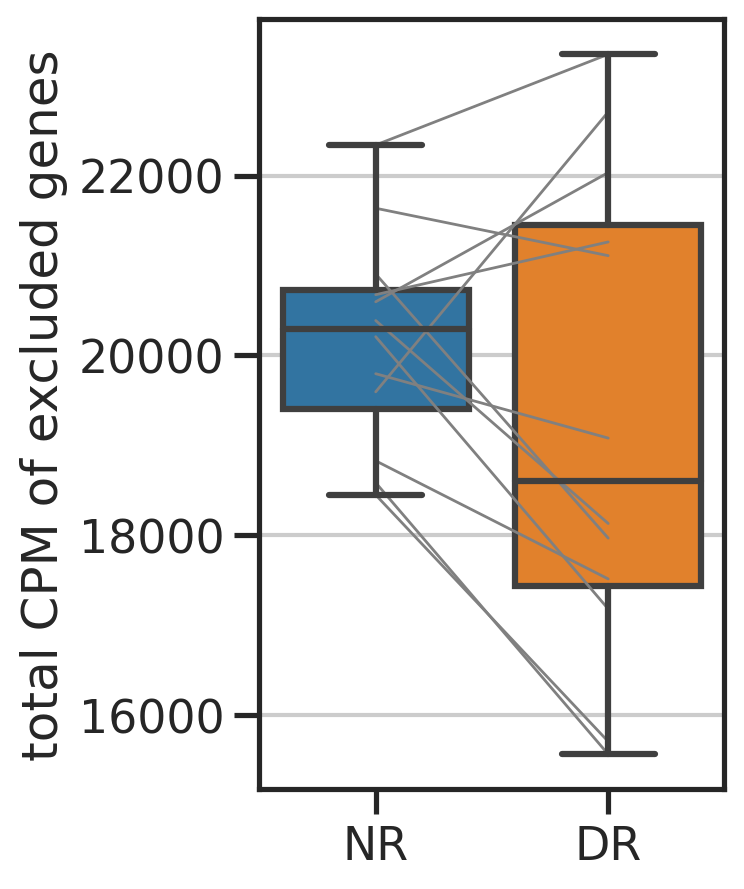

In [15]:
idx = np.arange(len(genes))[~expressed_any]
tensor_nr_ctrl = pbulks[0].T[idx]
tensor_dr_ctrl = pbulks[1].T[idx]

a = np.sum(np.power(10, tensor_nr_ctrl)-1, axis=0).ravel()
b = np.sum(np.power(10, tensor_dr_ctrl)-1, axis=0).ravel()

fig, ax = plt.subplots(figsize=(3,5))
for ai, bi in zip(a,b):
    ax.plot([0,1], [ai,bi], '-', color='gray', linewidth=1, markersize=1)
sns.boxplot([a,b], ax=ax)
ax.set_ylabel('total CPM of excluded genes')
ax.set_xticklabels(['NR', 'DR'])
plt.show()

# Do the tests

In [16]:
# test for each gene and cell type; 4 rep vs 4 rep - t-test and p-val correction 
ts, ps = ttest_ind(tensor_nr, tensor_dr, axis=2)
rs, qs, _, _ = multipletests(np.nan_to_num(ps, nan=1).reshape(-1,), method='fdr_bh')
rs = rs.reshape(ps.shape)
qs = qs.reshape(ps.shape)

# effect size
lfc = np.log2(10)*(np.mean(tensor_dr, axis=2) - np.mean(tensor_nr, axis=2)) # log2FC (log10CPM as raw counts)
# higherexp = np.maximum(np.mean(tensor_dr, axis=2), np.mean(tensor_nr, axis=2)) # mean exp for every gene type pair in the higher expressed condition

# why -- not expressed
i, j = np.where(np.isnan(ps))
np.isnan(ps).sum(), np.sum(tensor_nr[i,j]), np.sum(tensor_dr[i,j])

(0, 0.0, 0.0)

In [17]:
fc_threshold = 2
cond1   = rs # FDR< 0.05
cond2   = np.abs(lfc) >  np.log2(fc_threshold) 
cond2up = lfc         >  np.log2(fc_threshold) 
cond2dn = lfc         < -np.log2(fc_threshold) 

sde    = np.all([cond1, cond2],   axis=0)
sde_up = np.all([cond1, cond2up], axis=0)
sde_dn = np.all([cond1, cond2dn], axis=0)

sigsum = pd.DataFrame(index=unq_types)
sigsum['rej']   = np.sum(rs, axis=0)
sigsum['DE']    = np.sum(sde, axis=0)
sigsum['DR_up'] = np.sum(sde_up, axis=0)
sigsum['DR_dn'] = np.sum(sde_dn, axis=0)
sigsum

,rej,DE,DR_up,DR_dn
L2/3_A,385,70,63,7
L2/3_B,1807,226,167,59
L2/3_C,1711,304,217,87


In [18]:
# def extract_res_onetype(idx):
#     return genes_comm[sde_up[:,idx]], genes_comm[sde_dn[:,idx]]

# sigsum_genes = sigsum.copy()
# ups = []
# dns = []
# for i, (_type, row) in enumerate(sigsum.iterrows()):
#     _up, _dn = extract_res_onetype(i)
#     ups.append(", ".join(_up))
#     dns.append(", ".join(_dn))
    
# sigsum_genes['genes_up'] = ups 
# sigsum_genes['genes_dn'] = dns 
# sigsum_genes
# # sigsum_genes.to_csv('../results/P28_NR_DR_DEGs_Oct27.csv', header=True, index=True)

In [19]:
res = pd.DataFrame()
gi_up, ti_up = sde_up.nonzero()
gi_dn, ti_dn = sde_dn.nonzero()
res['gene'] = genes_comm[np.hstack([gi_up, gi_dn])]
res['type'] = unq_types[np.hstack([ti_up, ti_dn])]
res['reason'] = ['DRup']*len(gi_up) + ['DRdn']*len(gi_dn)

# res.to_csv(os.path.join(outdir, 'DEGs_NRvsDR_P28P38_April11.csv'), header=True, index=False)
res

,gene,type,reason
0,Gm29107,L2/3_B,DRup
1,Prim2,L2/3_B,DRup
2,Prim2,L2/3_C,DRup
3,Bag2,L2/3_A,DRup
4,Bag2,L2/3_B,DRup
...,...,...,...
595,Ak3,L2/3_C,DRdn
596,Gm28578,L2/3_B,DRdn
597,Gm28578,L2/3_C,DRdn
598,Rbm20,L2/3_B,DRdn


In [20]:
res.groupby(['type', 'reason']).size().unstack().fillna(0).astype(int) #.value_counts()

reason,DRdn,DRup
type,,
L2/3_A,7,63
L2/3_B,59,167
L2/3_C,87,217


In [21]:
res['gene'].unique().shape

(386,)

In [22]:
def num_up(reasons):
    return np.sum(reasons == 'DRup')

def num_dn(reasons):
    return np.sum(reasons == 'DRdn')
    
def overall(reasons):
    a = num_up(reasons)
    b = num_dn(reasons)
    
    if a == 0 and b > 0:
        return 'DR_dn'
    elif b == 0 and a > 0:
        return 'DR_up'
    elif a > 0 and b > 0:
        return 'DR_updn'

resflat = res.groupby('gene').agg({'reason': (num_up, num_dn, overall)})['reason'] #  'reason': get_num_dn})
resflat

,num_up,num_dn,overall
gene,,,
1600020E01Rik,1,0,DR_up
1700012D14Rik,0,1,DR_dn
1700016P03Rik,3,0,DR_up
1700019D03Rik,0,2,DR_dn
2900060N12Rik,0,1,DR_dn
...,...,...,...
Zfp956,0,1,DR_dn
Zfp961,0,1,DR_dn
Zhx2,2,0,DR_up


In [23]:
resflat.to_csv('/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/DR_DEGs_240708.csv')

# show results

In [24]:
def show_onetype(idx, columns=["NR_1", "NR_2", "NR_3", "NR_4", 
                               "DR_1", "DR_2", "DR_3", "DR_4",
                              ]):
    """idx - cell type idx
    """
    gidx = np.logical_or(sde_up[:,idx], sde_dn[:,idx])
    _genes = genes_comm[gidx]

    p_nr = tensor_nr[gidx,:,:][:,idx,:]
    p_dr = tensor_dr[gidx,:,:][:,idx,:]
    
    
    ab = np.hstack([p_nr, p_dr])
    nr_mean = np.mean(p_nr, axis=1)
    ab = (ab - nr_mean.reshape(-1,1))*np.log2(10) # log2 FC w.r.t. the mean in NR
    ab = pd.DataFrame(ab, index=_genes, columns=columns)
    
    this_mlfc = (np.mean(p_nr, axis=1) - np.mean(p_dr, axis=1))*np.log2(10)
    this_ordr = np.argsort(this_mlfc)
    ab = ab.iloc[this_ordr]
    
    fig, ax = plt.subplots(figsize=(4, min(10, 0.3*len(ab))))
    sns.heatmap(ab, center=0, cmap='coolwarm', yticklabels=True, cbar_kws=dict(shrink=0.5, label='log2 FC (w.r.t. NR mean)'))
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(unq_types[idx])
    plt.show()

In [25]:
def show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn, ax=None, bbox_to_anchor=(1,1), loc=None):
    """
    Gene by type matrices: 
        lfc matrix: log fold change
        qs matirx:
    
        cond1 : significant or not? 
        cond2up: FC above the cutoff?
        cond2dn: FC below the cutoff?
    
    thetypeidx: pick a type - one column index from the above matrices
    """
    eff = lfc[:,thetypeidx]
    pvl =  qs[:,thetypeidx]

    cnd_up = np.all([cond1[:,thetypeidx], 
                     cond2up[:,thetypeidx]], axis=0) 
    cnd_dn = np.all([cond1[:,thetypeidx], 
                     cond2dn[:,thetypeidx]], axis=0) 

    if ax is None:
        fig, ax = plt.subplots()
    else:
        pass
    ax.scatter(eff, -np.log10(pvl), s=1, color='gray')

    ax.scatter(eff[cnd_up], -np.log10(pvl)[cnd_up], s=5, #s=5, 
               label=f'DR up (n={cnd_up.sum():,})')
    ax.scatter(eff[cnd_dn], -np.log10(pvl)[cnd_dn], s=5, #s=5, 
               label=f'DR dn (n={cnd_dn.sum():,})')

    ax.set_xlabel('log2(FC) (DR/NR in CPM)')
    ax.set_ylabel('-log10(FDR)')
    ax.set_title(f'{thetype}')
    ax.legend(bbox_to_anchor=bbox_to_anchor, loc=loc)
    return ax

In [26]:
types_order = [
    'L2/3_A', 
    'L2/3_B', 
    'L2/3_C', 
]
len(types_order)

3

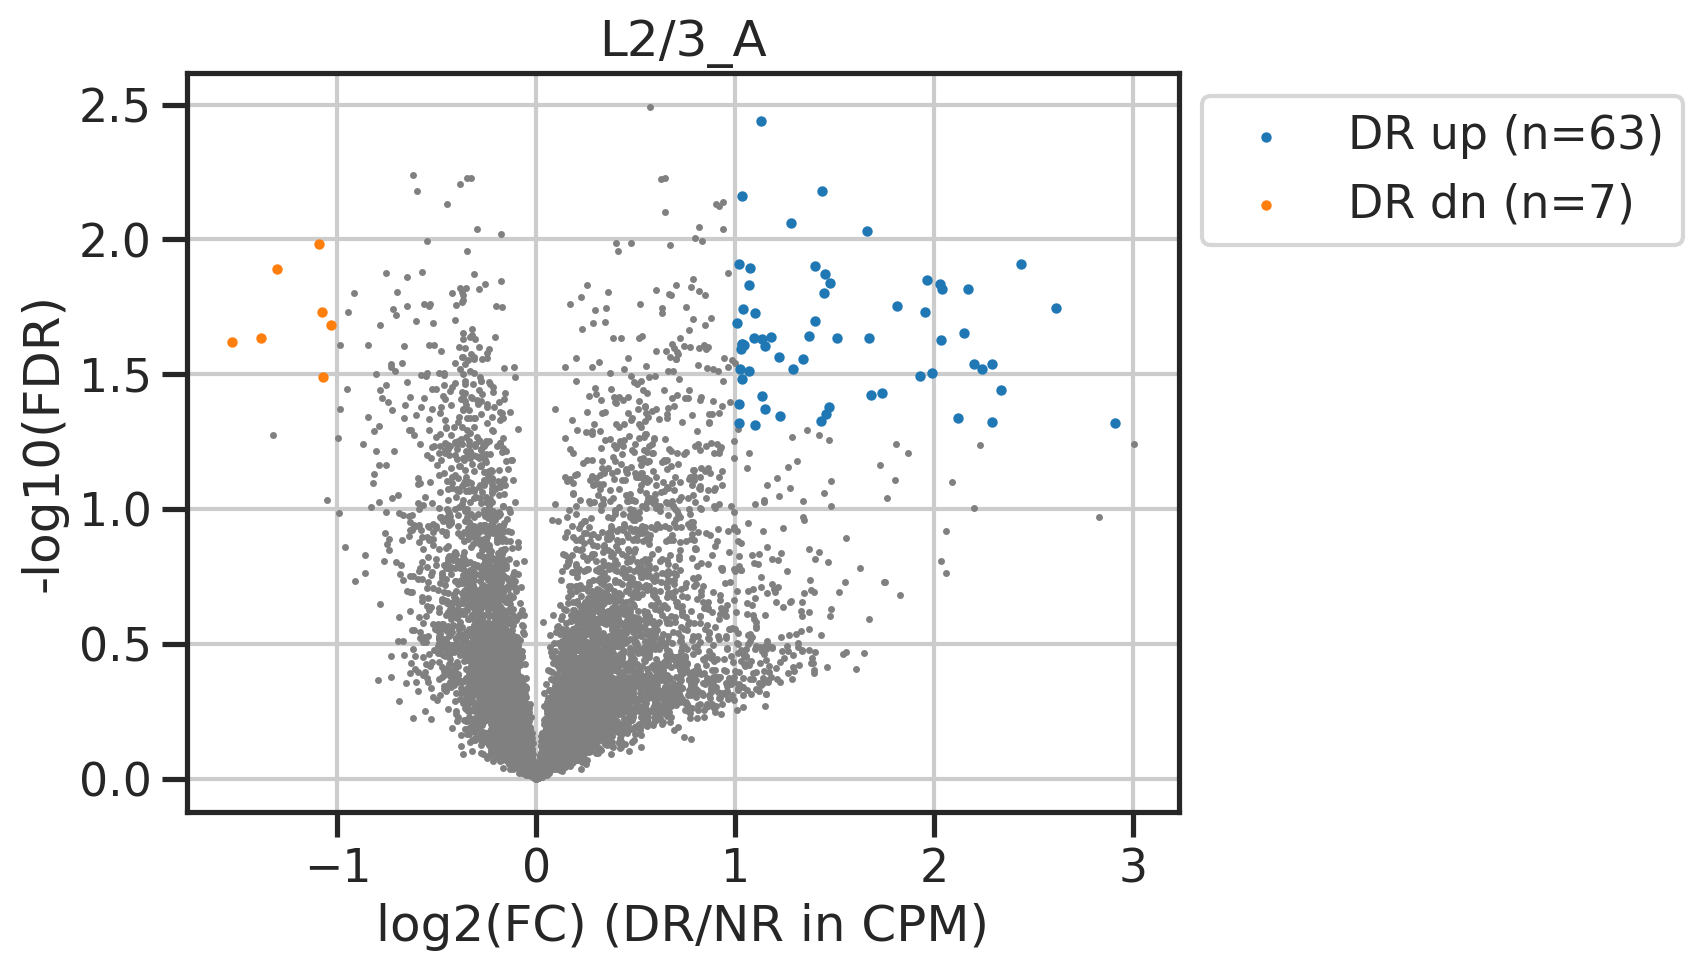

In [27]:
thetype = 'L2/3_A'
thetypeidx = basicu.get_index_from_array(unq_types, [thetype])[0]
assert thetypeidx != -1
show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn) 
plt.show()

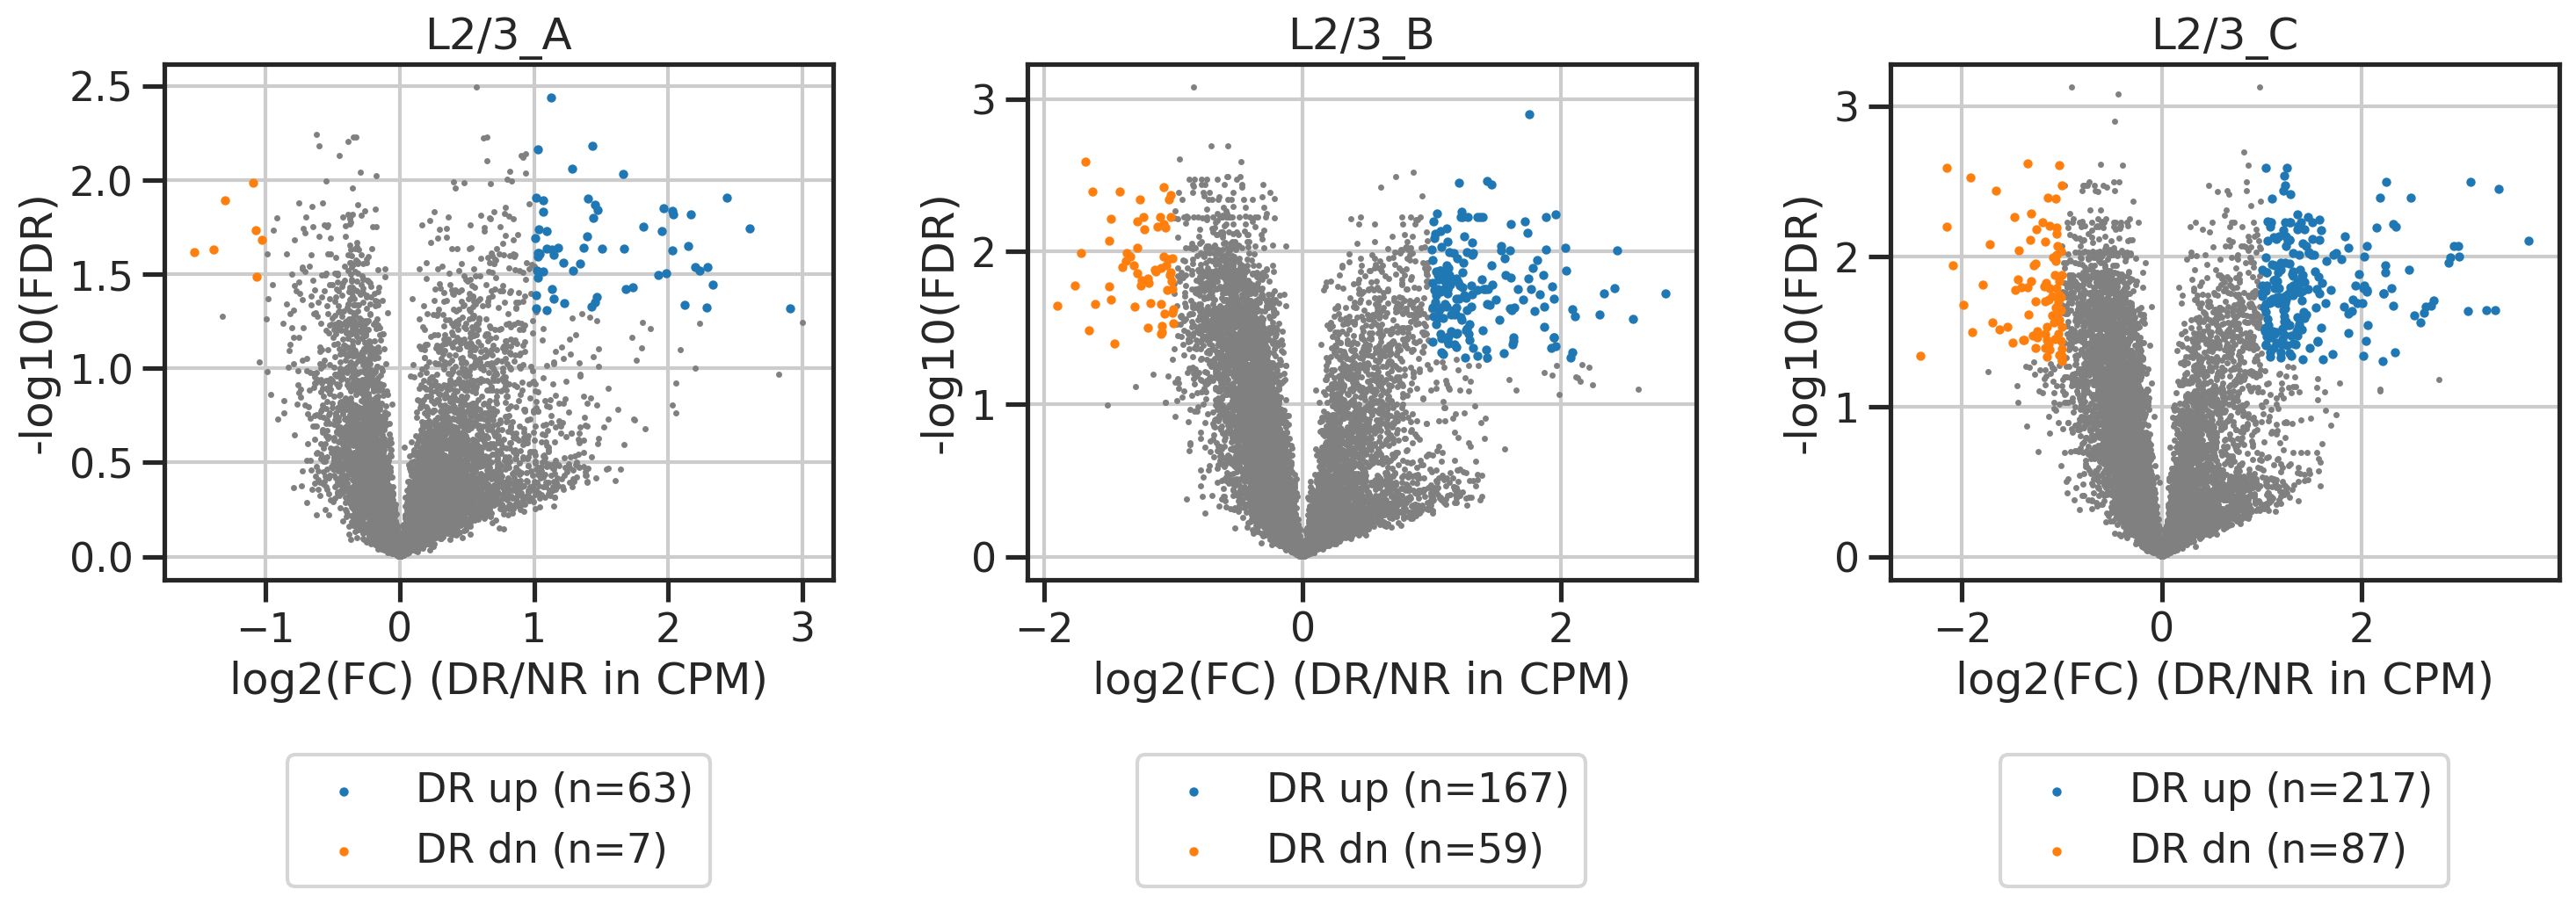

In [28]:
fig, axs = plt.subplots(1,3,figsize=(5*3,6*1))
for thetypeidx, thetype in enumerate(unq_types):
    assert thetypeidx != -1
    ax = axs.flat[thetypeidx]
    show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn, ax=ax, bbox_to_anchor=(0.5, -0.3), loc='upper center') 
fig.tight_layout()
plt.show()

In [29]:
sigsum

,rej,DE,DR_up,DR_dn
L2/3_A,385,70,63,7
L2/3_B,1807,226,167,59
L2/3_C,1711,304,217,87


saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/bar_2024-07-09.pdf


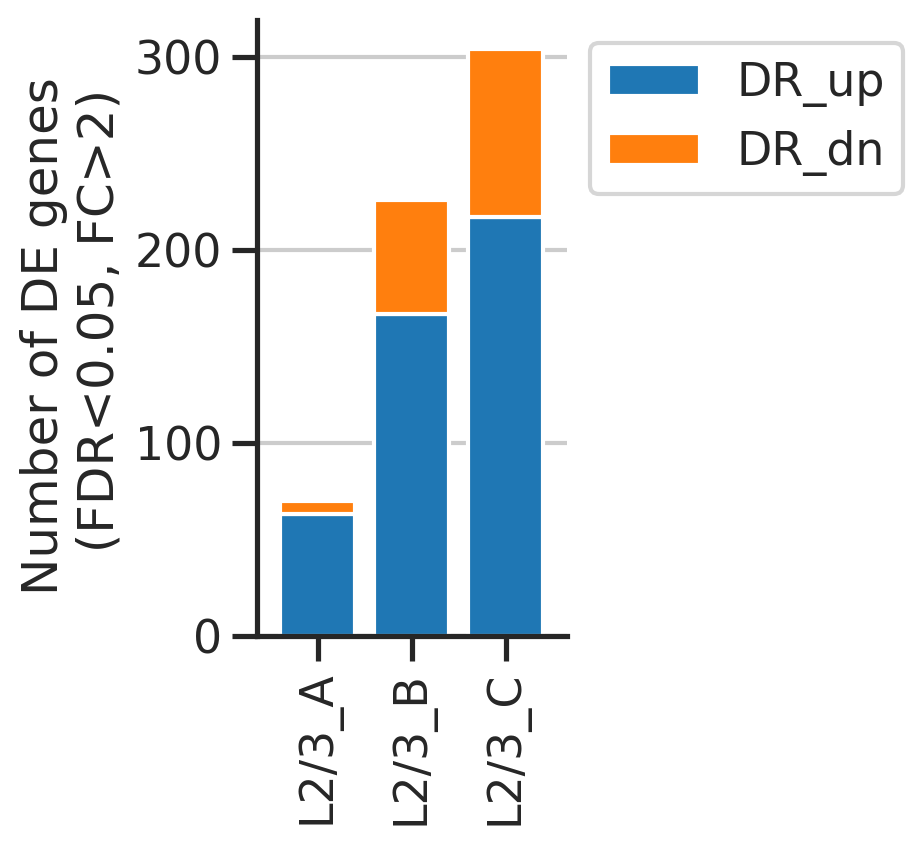

In [30]:
fig, ax = plt.subplots(figsize=(2,4))
sigsum.loc[types_order][['DR_up', 'DR_dn']].plot.bar(stacked=True, width=0.8, ax=ax)
ax.set_ylabel('Number of DE genes \n (FDR<0.05, FC>2)')

ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
ax.grid(axis='x')

output = os.path.join(outfigdir, "bar.pdf")
powerplots.savefig_autodate(fig, output)
plt.show()

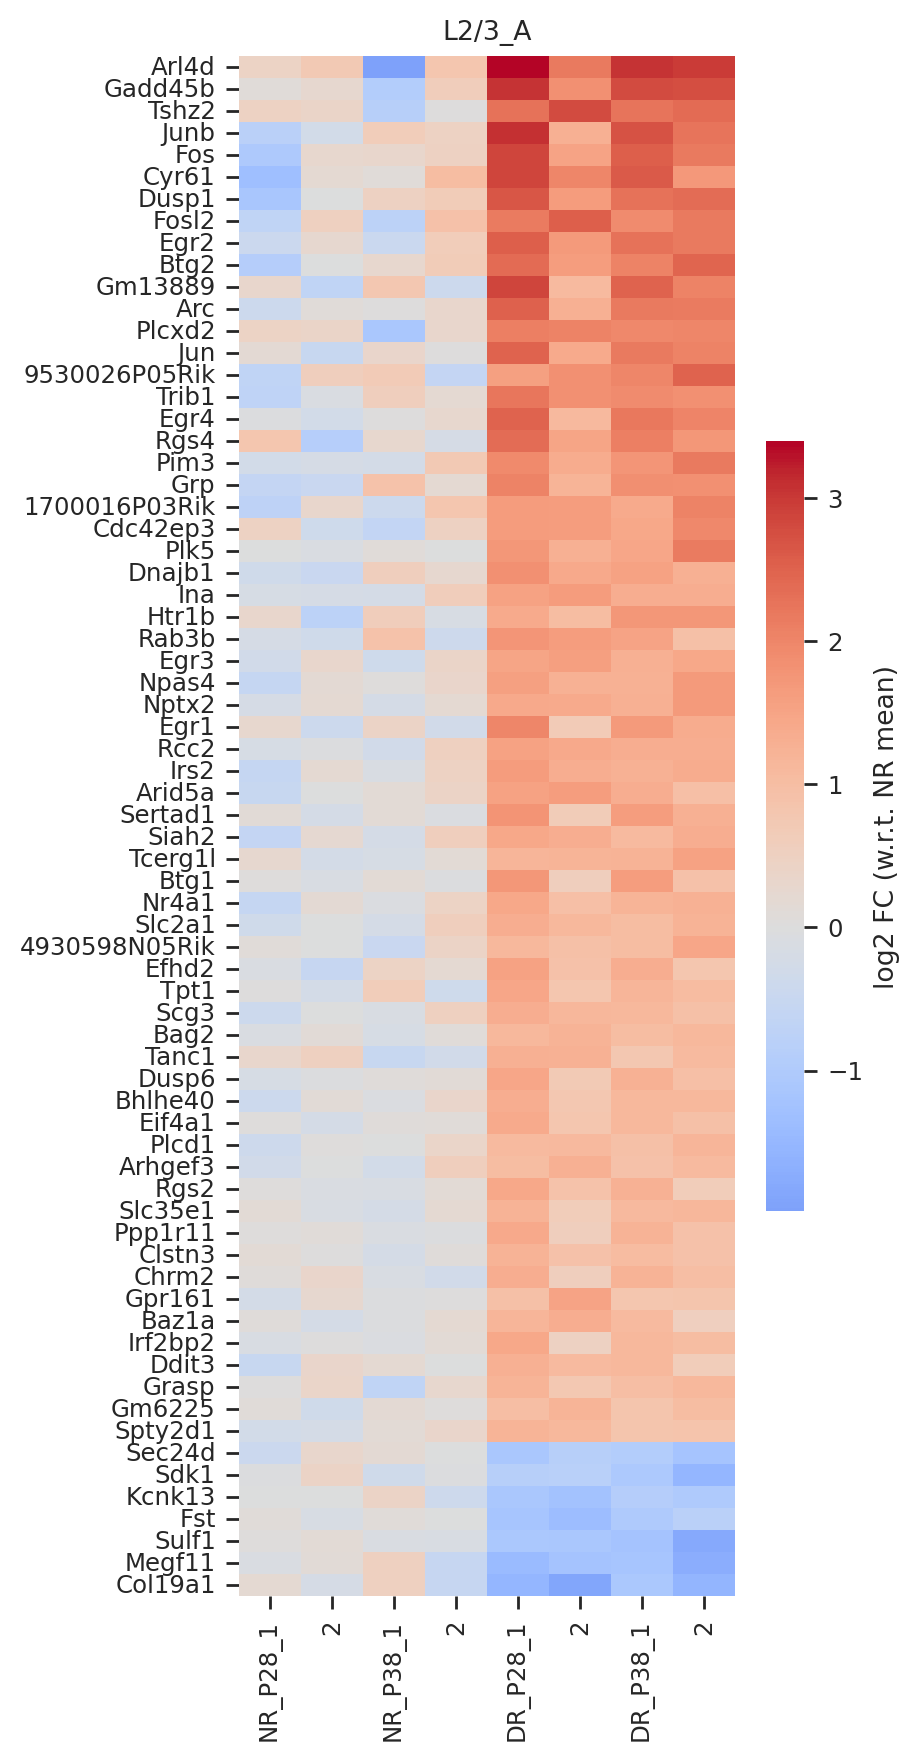

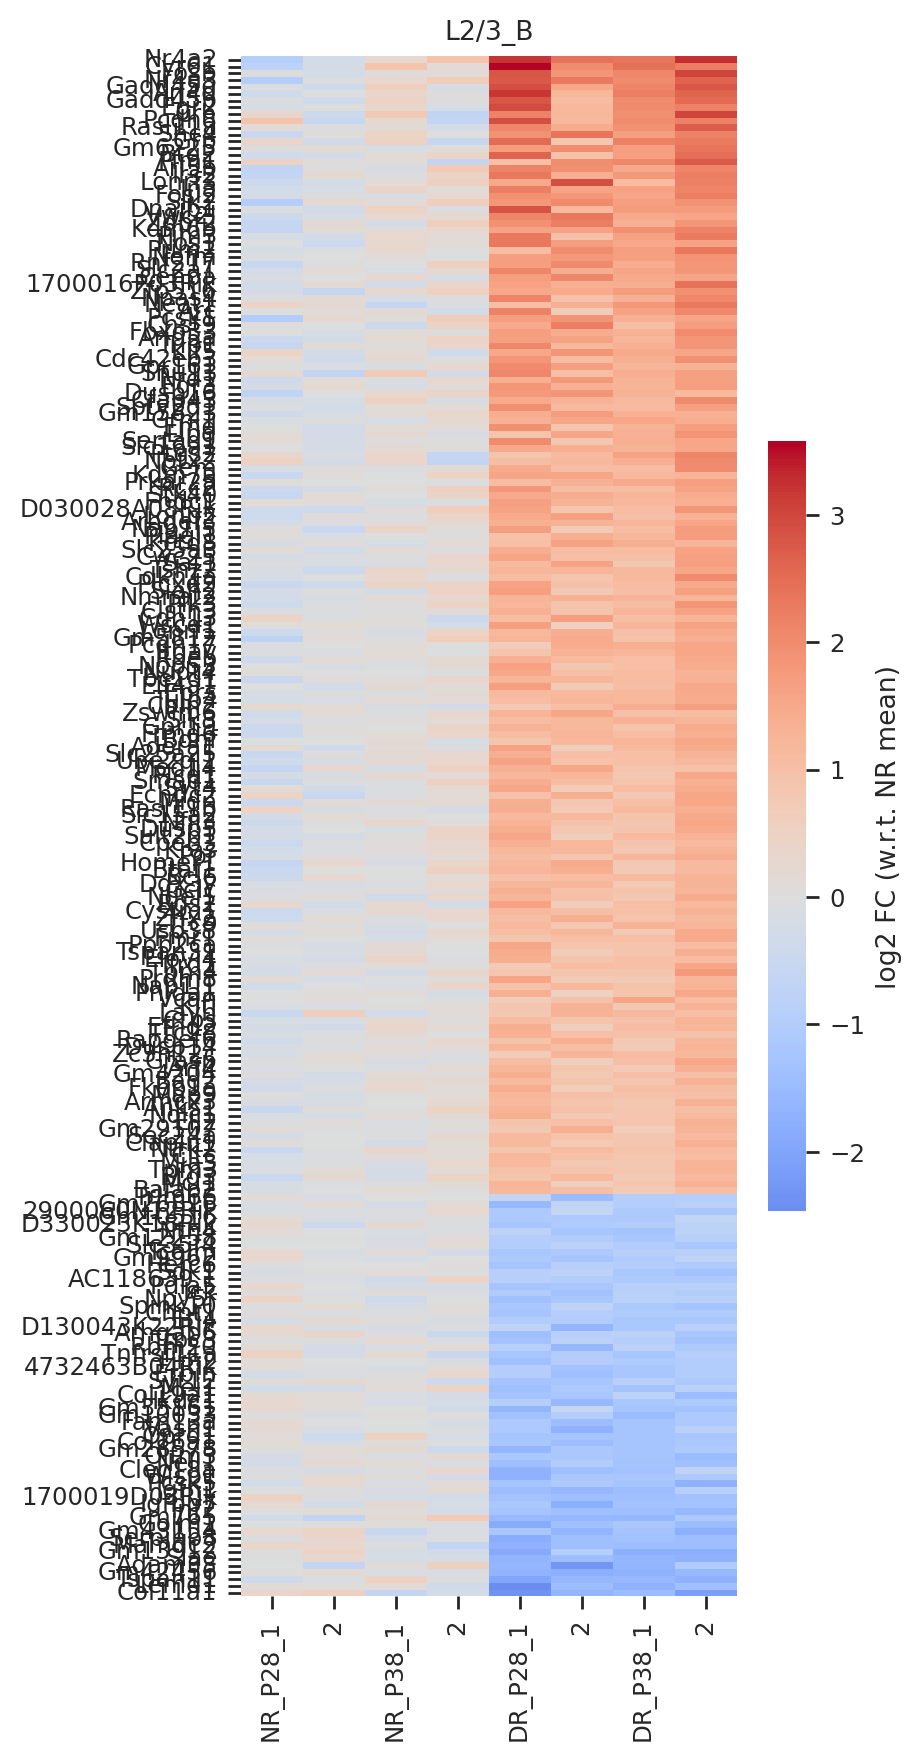

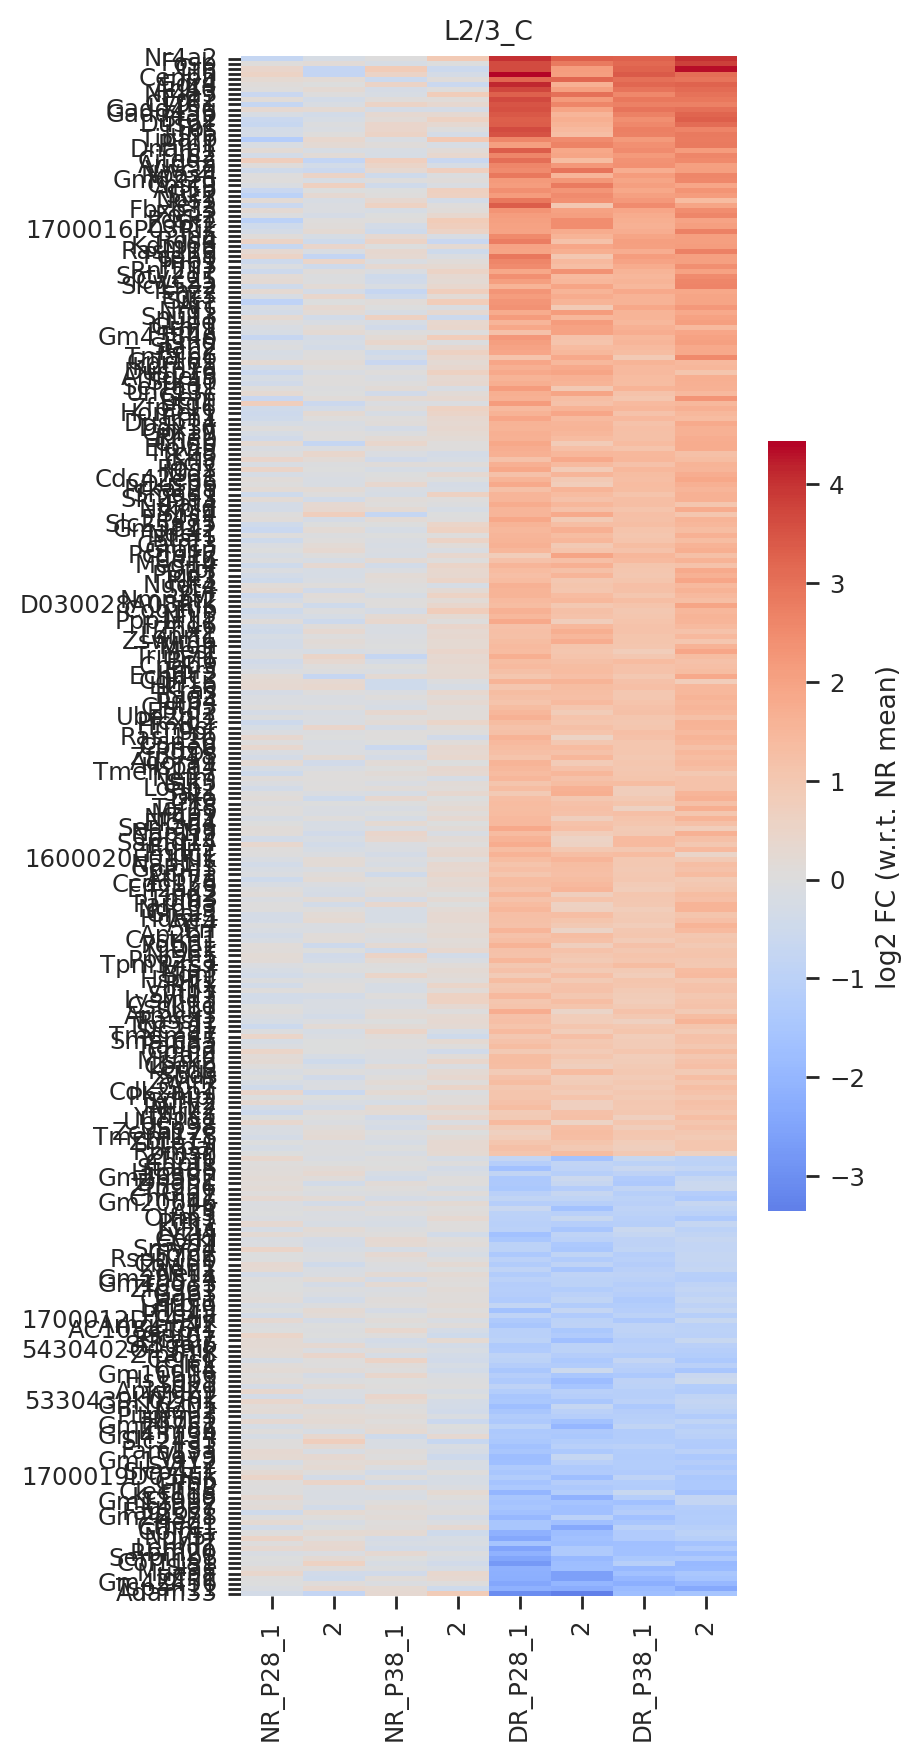

In [31]:
columns = [
    'NR_P28_1', '2', 'NR_P38_1', '2',
    'DR_P28_1', '2', 'DR_P38_1', '2',
]
with sns.plotting_context('paper'):
    for i, (_type, row) in enumerate(sigsum.iterrows()):
        if row['DE'] > 0:
            show_onetype(i, columns=columns)

# Check a few genes and see

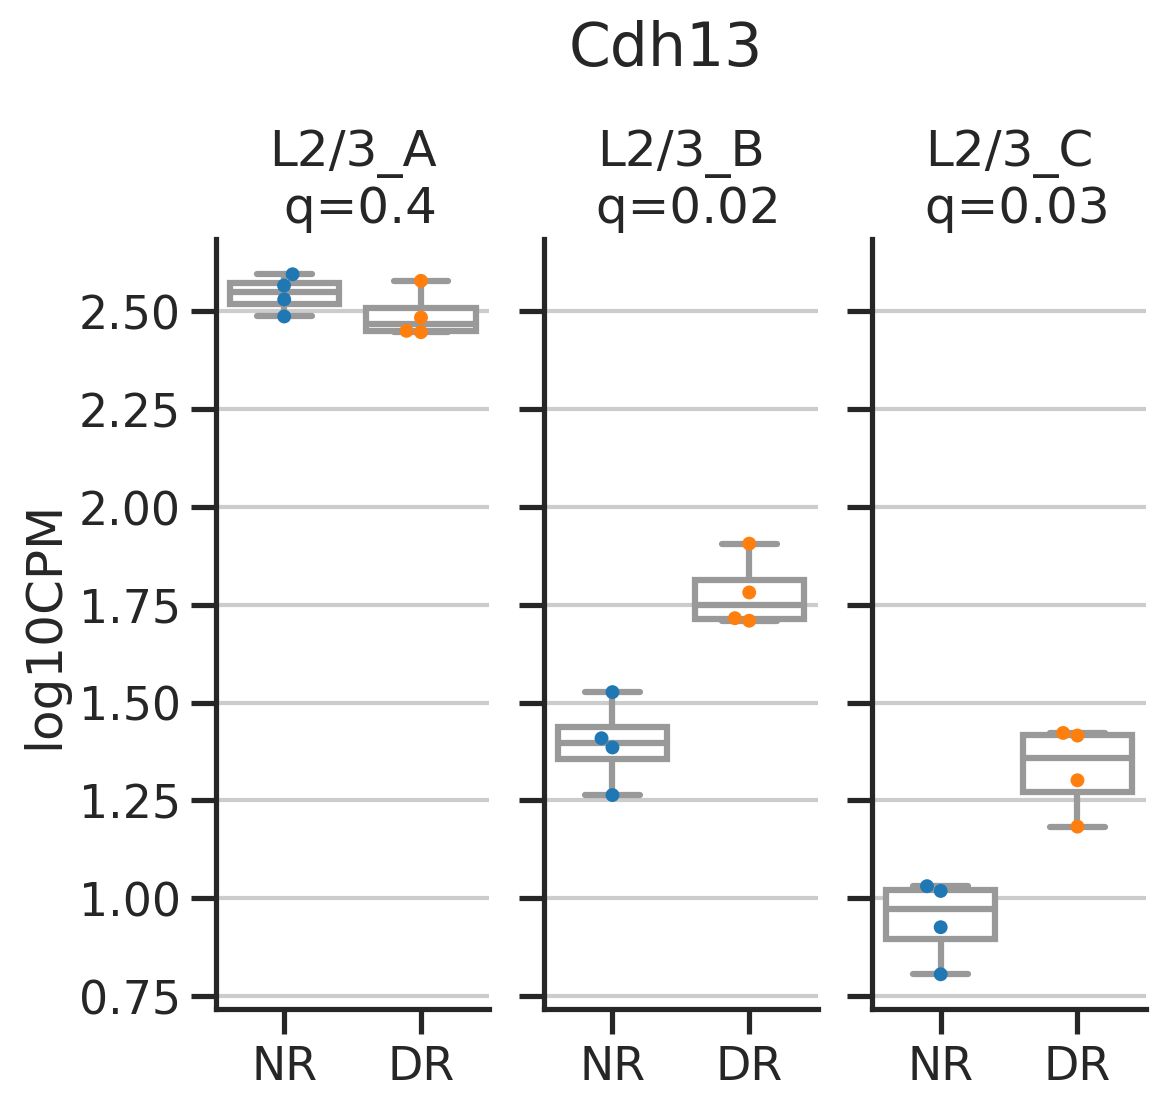

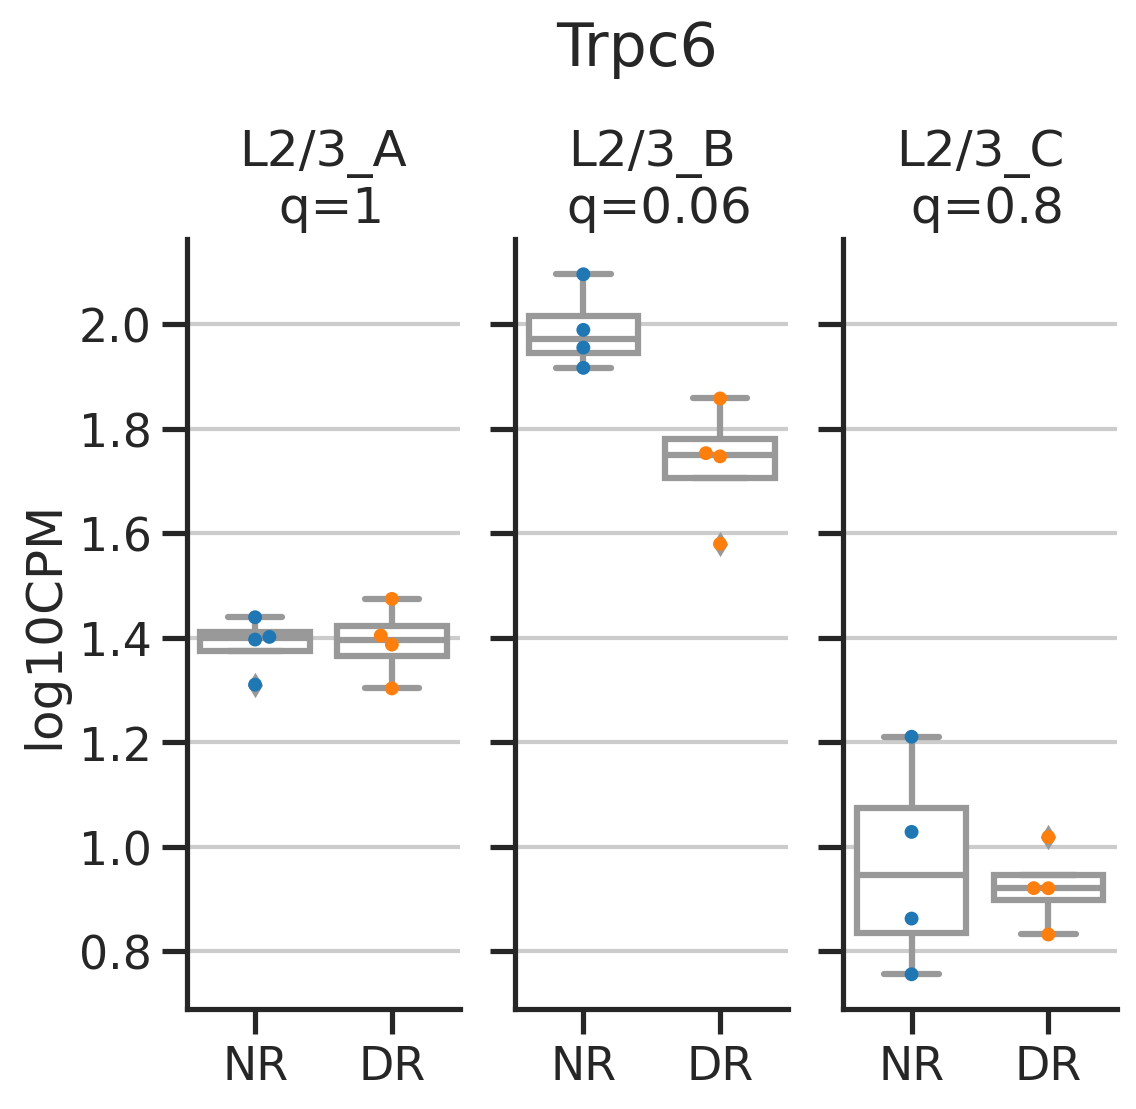

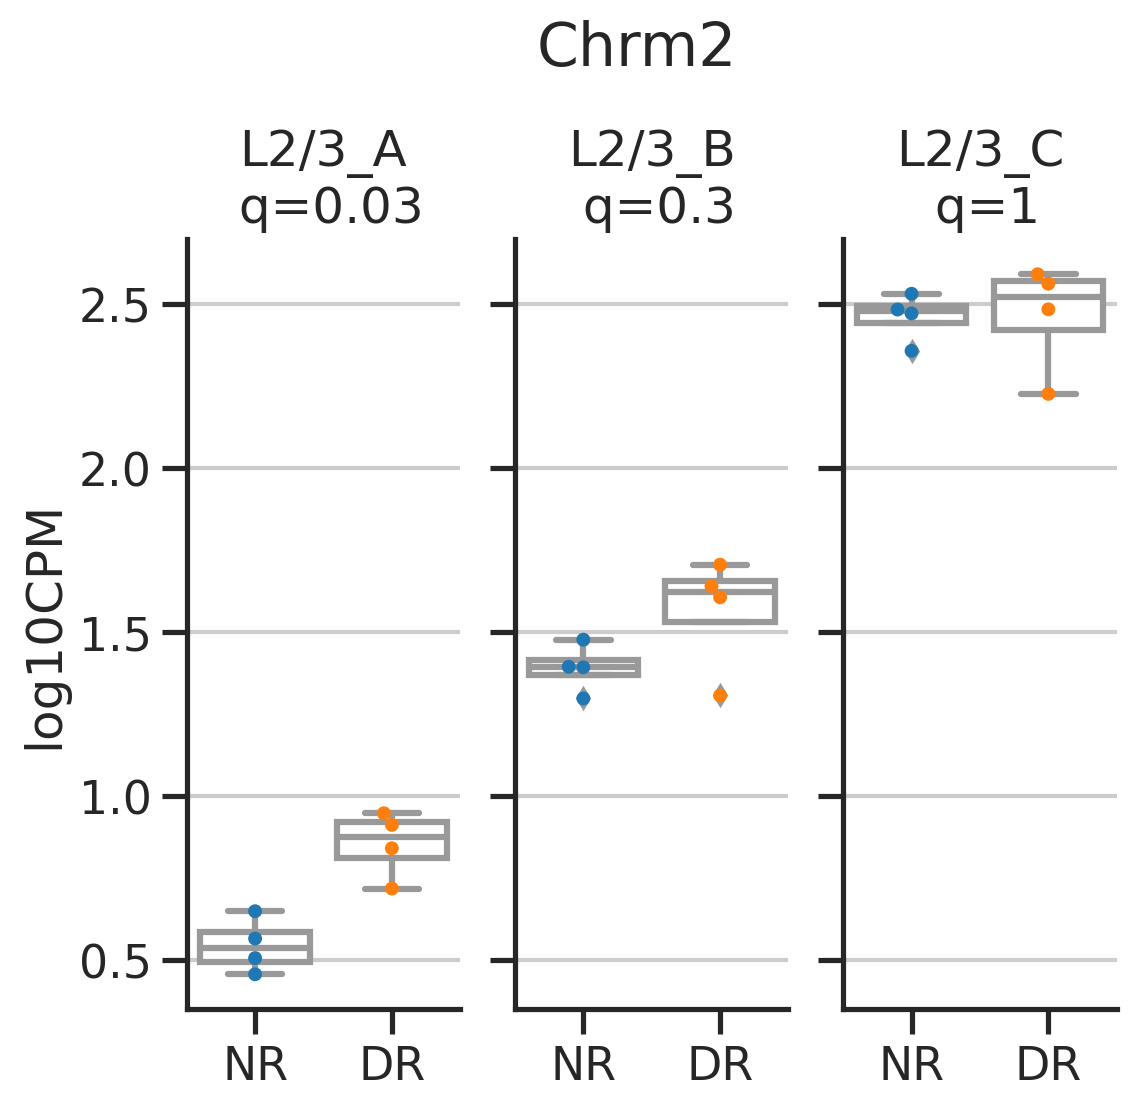

In [32]:
for gene_name in ['Cdh13', 'Trpc6', 'Chrm2']: #['Col19a1', 'Nr4a2', 'Fosb']:
    fig, axs = plt.subplots(1,3,figsize=(2*3,5), sharey=True)
    fig.suptitle(gene_name, y=1.1)
    for type_name, ax in zip(['L2/3_A', 'L2/3_B', 'L2/3_C'], axs):
        gidx = basicu.get_index_from_array(genes, [gene_name])[0]
        gidx2 = basicu.get_index_from_array(genes_comm, [gene_name])[0]
        cidx = basicu.get_index_from_array(unq_types, [type_name])[0]
        p_nr, p_dr = pbulks[:,:,:,gidx][:,:,cidx]
        assert gidx != -1
        assert cidx != -1

        sns.boxplot  ([p_nr, p_dr], color='white', ax=ax)
        sns.swarmplot([p_nr, p_dr], s=5, ax=ax)

        # check
        # l2fc2 = np.log2(10)*(np.mean(p_dr) - np.mean(p_nr))
        eff = lfc[gidx2, cidx]
        q   = qs[gidx2, cidx]
        sns.despine(ax=ax)

        ax.set_xticklabels(['NR', 'DR'])
        ax.set_ylabel('log10CPM')
        ax.set_title(f'{type_name}\n q={q:.1g}')
    plt.show()

# a plot of those unique genes across all cell types

In [33]:
from scipy.stats import zscore

In [34]:
degs = np.unique(res['gene'])
degs_idx = basicu.get_index_from_array(genes, degs)

row = degs
col = unq_types

In [35]:
a = pbulks[:,:,:,degs_idx].T
a = np.swapaxes(a,2,3)
a0,a1,a2,a3 = a.shape # gene, type, cond, rep
am = zscore(np.mean(a, axis=(2,3)), axis=1)
af = zscore(a.reshape(a0, a1*a2*a3), axis=1)


rowidx = np.array(basicu.order_by_hc(af))
colidx = np.array(basicu.order_by_hc(am.T))
# colidx = basicu.get_index_from_array(xclsts_sel, types_order)
colidx_expanded = np.ravel(a2*a3*colidx.reshape(-1,1) + np.repeat(np.arange(a2*a3).reshape(1,-1), len(colidx), axis=0))

In [36]:
nr_mean = np.mean(a, axis=3)[:,:,0]
a_lfc = np.log2(10)*(a-nr_mean.reshape(a0,a1,1,1))
af_lfc = a_lfc.reshape(a0, a1*a2*a3)

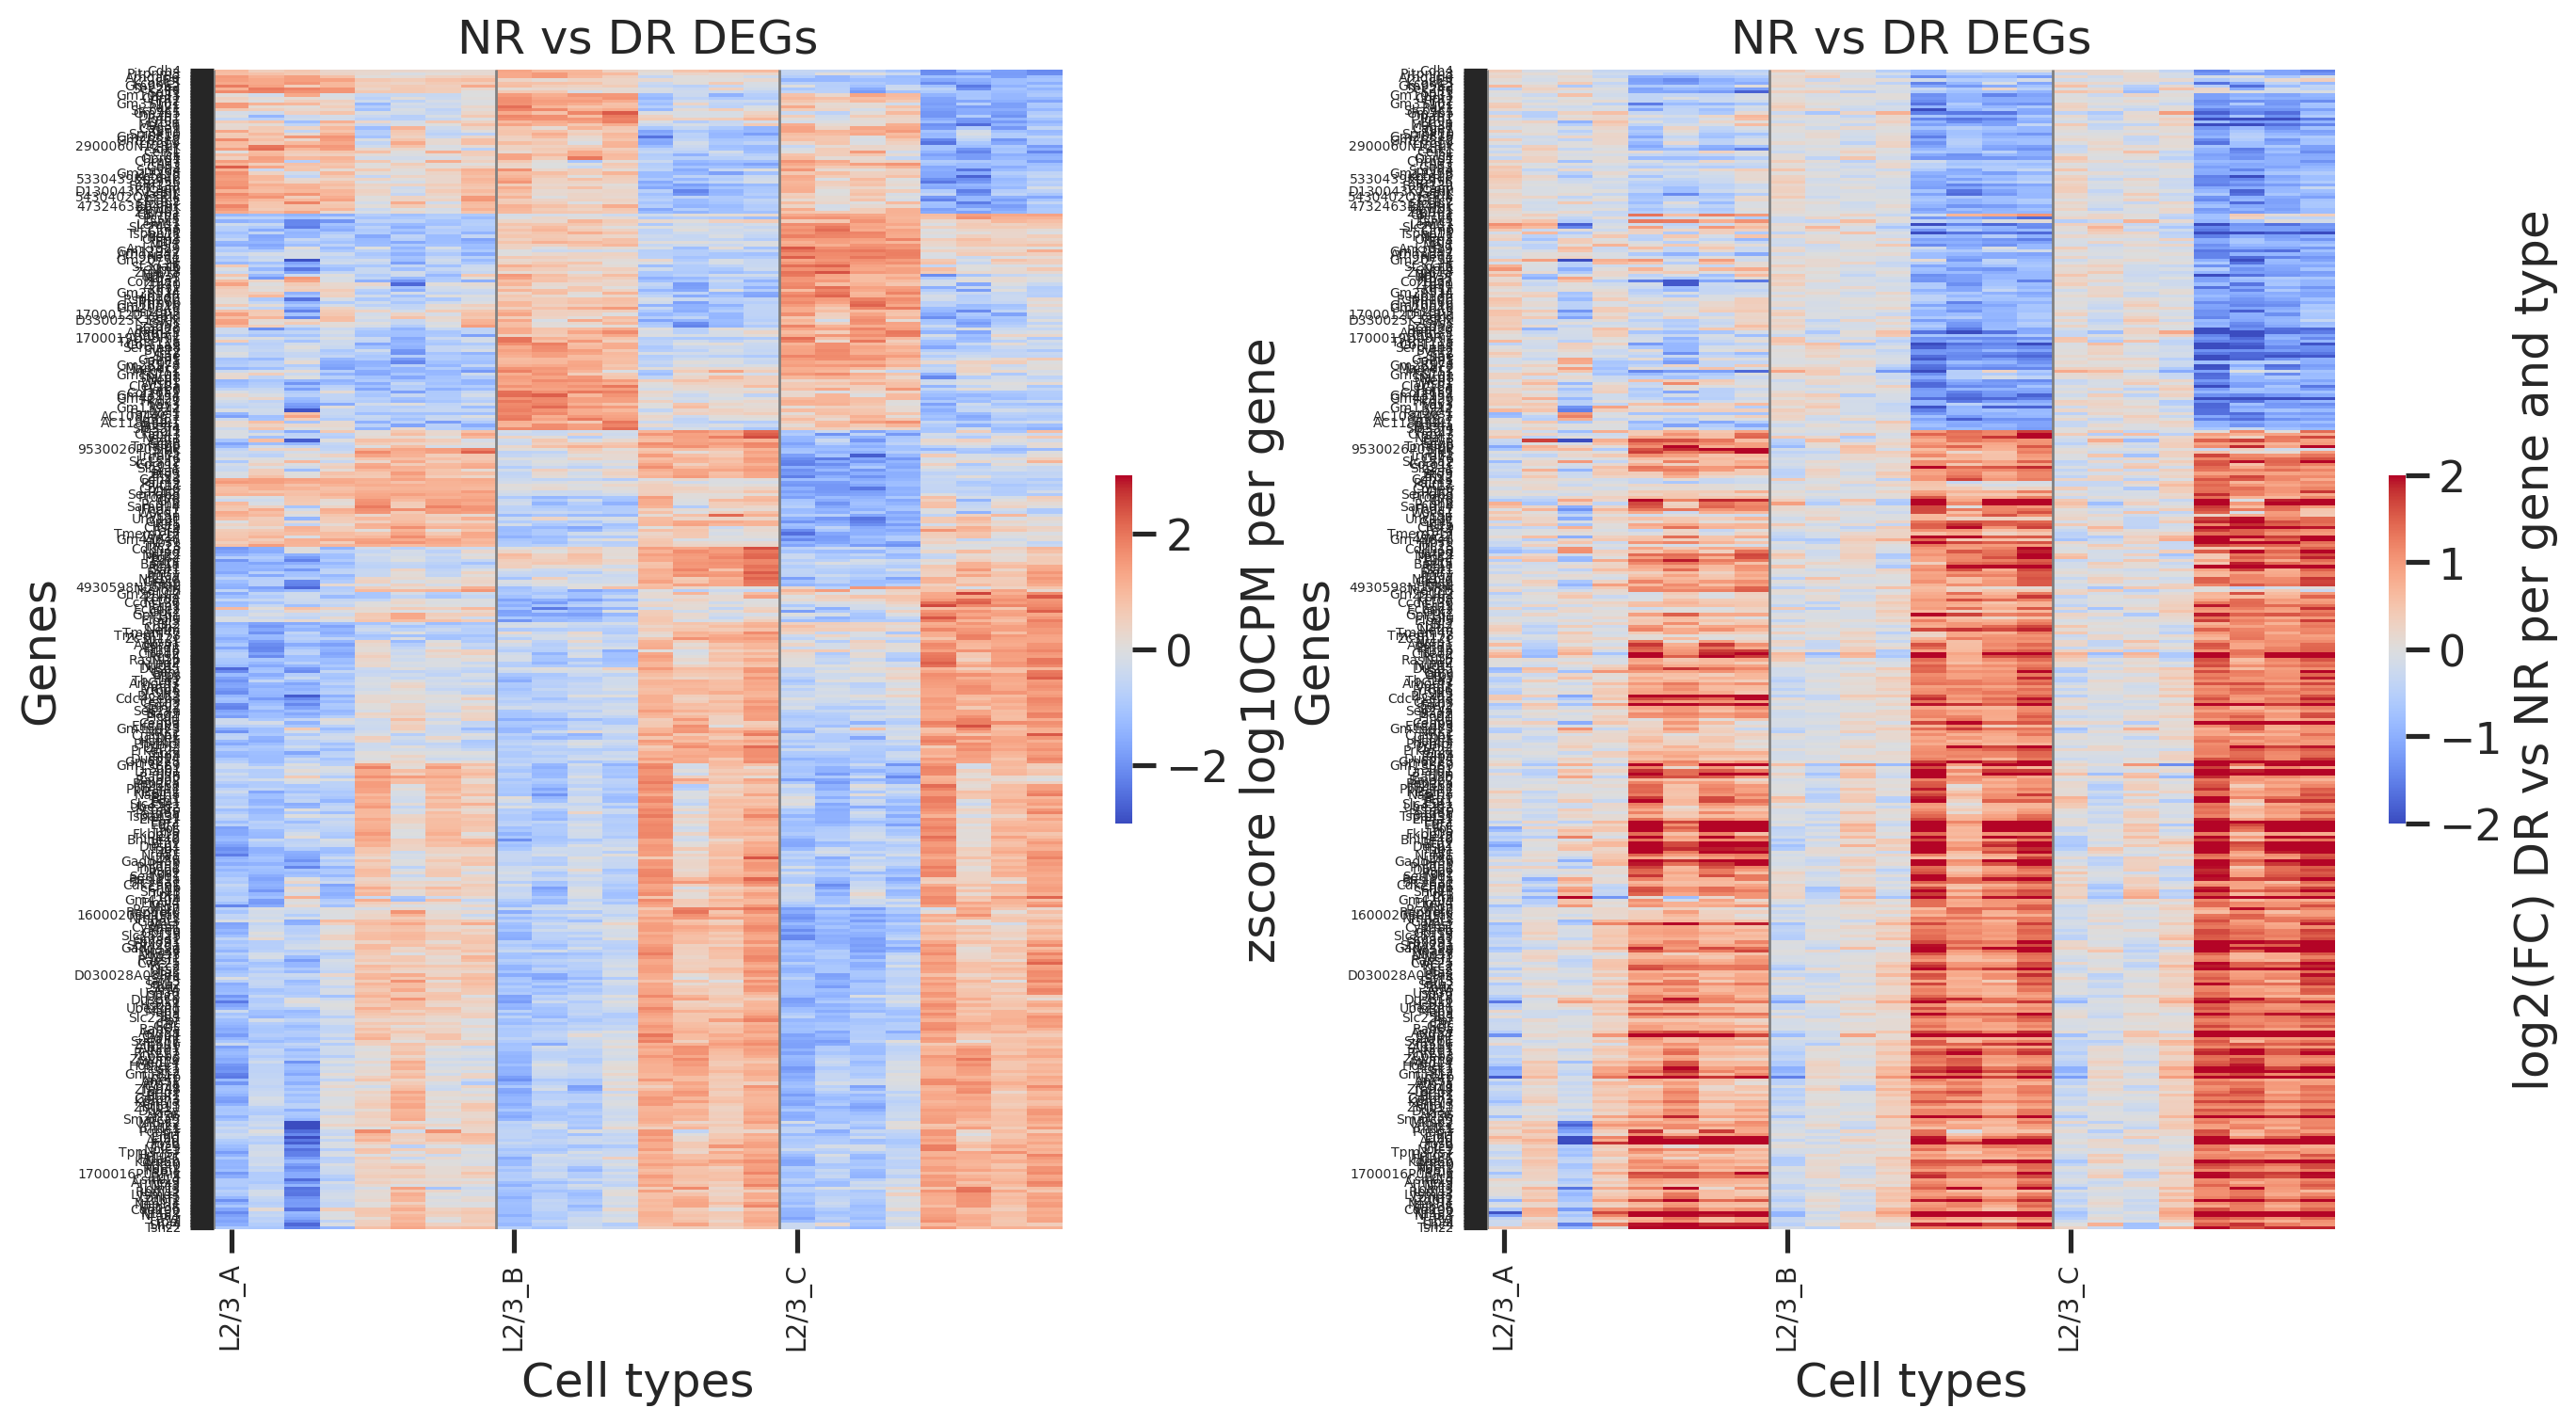

In [37]:
fig, axs = plt.subplots(1,2,figsize=(8*2,8))
ax = axs[0]
sns.heatmap(af[rowidx][:,colidx_expanded], 
            yticklabels=True,
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='zscore log10CPM per gene'),
            cmap='coolwarm', 
            center=0, vmin=-3, vmax=3,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(col[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(row[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')

ax = axs[1]
sns.heatmap(af_lfc[rowidx][:,colidx_expanded], 
            yticklabels=True, # 20, #degs[rowidx],
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='log2(FC) DR vs NR per gene and type'),
            cmap='coolwarm', 
            center=0, vmin=-2, vmax=2,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(col[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(row[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')
plt.show()

# overlap with type genes

In [38]:
def num_up(reasons):
    return np.sum(reasons == 'DRup')

def num_dn(reasons):
    return np.sum(reasons == 'DRdn')
    
def overall(reasons):
    a = num_up(reasons)
    b = num_dn(reasons)
    
    if a == 0 and b > 0:
        return 'DR_dn'
    elif b == 0 and a > 0:
        return 'DR_up'
    elif a > 0 and b > 0:
        return 'DR_updn'

resflat = res.groupby('gene').agg({'reason': (num_up, num_dn, overall)})['reason'] #  'reason': get_num_dn})
resflat

,num_up,num_dn,overall
gene,,,
1600020E01Rik,1,0,DR_up
1700012D14Rik,0,1,DR_dn
1700016P03Rik,3,0,DR_up
1700019D03Rik,0,2,DR_dn
2900060N12Rik,0,1,DR_dn
...,...,...,...
Zfp956,0,1,DR_dn
Zfp961,0,1,DR_dn
Zhx2,2,0,DR_up


In [39]:
#
cond_overlap1 = (
         (resflat['num_up'] != 0) & 
         (resflat['num_dn'] != 0)
       )
cond_overlap2 = (
         (resflat['num_up'] != 0) & 
         (resflat['num_dn'] == 0)
       )
cond_overlap3 = (
         (resflat['num_up'] == 0) & 
         (resflat['num_dn'] != 0)
       )

# resflat[cond_overlap1]
print("up and down", cond_overlap1.sum())
print("up only", cond_overlap2.sum())
print("down only", cond_overlap3.sum())

up and down 0
up only 268
down only 118


In [40]:
# f = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot.csv'
# fout = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot_v3_july8_2024.csv'

# df2 = pd.read_csv(f)
# df2['DR_DE'] = df2['gene'].apply(lambda x: x in degs) 
# df2 = pd.merge(df2, resflat['overall'].rename('DR_updn'), left_on='gene', right_index=True, how='left')
# df2.to_csv(fout, header=True, index=False)
# df2

In [41]:
f = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot_v3_july8_2024.csv'
df2 = pd.read_csv(f)
df2

,gene,group,ispicked,P17on,P14,DR,DR_DE,DR_updn
0,Matn2,A2,True,A,BC,1,False,NaN
1,Fam126a,A2,False,A,unsure,1,False,NaN
2,Egfem1,A2,True,A,unsure,unsure,False,NaN
3,Gm19410,A2,False,A,unsure,1,False,NaN
4,Grk3,A2,False,A,unsure,1,False,NaN
...,...,...,...,...,...,...,...,...
281,Brinp3,C3,True,C,BC,unsure,False,NaN
282,Ell2,C3,True,C,unsure,3,True,DR_up
283,Gm21949,C3,False,C,unsure,unsure,False,NaN
284,Jdp2,C3,True,C,BC,3,False,NaN


In [42]:
typegenes = df2['gene'].values
degs_up = resflat[resflat['overall']=='DR_up'].index.values
degs_dn = resflat[resflat['overall']=='DR_dn'].index.values

detgs = np.intersect1d(degs, typegenes)
detgs_up = np.intersect1d(degs_up, typegenes)
detgs_dn = np.intersect1d(degs_dn, typegenes)
print(degs.shape, typegenes.shape, detgs.shape)
print(detgs.shape, detgs_up.shape, detgs_dn.shape)
detgs, detgs_up, detgs_dn

(386,) (286,) (38,)
(38,) (19,) (19,)


(array(['Arhgap42', 'Baz1a', 'Bdnf', 'Cbln2', 'Cdh13', 'Cdh4', 'Chrm2',
        'Clmp', 'Col11a1', 'Col26a1', 'Cpne6', 'Ell2', 'Etl4', 'Heg1',
        'Hkdc1', 'Igfn1', 'Kcnk13', 'Kctd8', 'Lemd1', 'Mei1', 'Nefm',
        'Nell1', 'Neu2', 'Npas4', 'Nptx2', 'Ntn4', 'Olfm3', 'Otof',
        'Palm2', 'Pcsk5', 'Scg3', 'Sema6a', 'Slc24a3', 'Syt17', 'Tmem117',
        'Ttc28', 'Vwc2l', 'Zfp618'], dtype=object),
 array(['Baz1a', 'Bdnf', 'Cbln2', 'Cdh13', 'Chrm2', 'Cpne6', 'Ell2',
        'Kctd8', 'Nefm', 'Npas4', 'Nptx2', 'Otof', 'Palm2', 'Scg3',
        'Sema6a', 'Syt17', 'Tmem117', 'Ttc28', 'Vwc2l'], dtype=object),
 array(['Arhgap42', 'Cdh4', 'Clmp', 'Col11a1', 'Col26a1', 'Etl4', 'Heg1',
        'Hkdc1', 'Igfn1', 'Kcnk13', 'Lemd1', 'Mei1', 'Nell1', 'Neu2',
        'Ntn4', 'Olfm3', 'Pcsk5', 'Slc24a3', 'Zfp618'], dtype=object))

In [43]:
dfplot = pd.merge(resflat['overall'].rename('DR'), df2.set_index('gene')['P17on'].rename('type'), 
                  left_index=True, right_index=True, how='outer')
dfplot['isType']= ~pd.isna(dfplot['type'])
dfplot['isDR']  = ~pd.isna(dfplot['DR'])
dfplot['DR_up'] = dfplot['DR'].apply(lambda x: x == 'DR_up') 
dfplot['DR_dn'] = dfplot['DR'].apply(lambda x: x == 'DR_dn') 
dfplot

,DR,type,isType,isDR,DR_up,DR_dn
gene,,,,,,
1600020E01Rik,DR_up,NaN,False,True,True,False
1700012D14Rik,DR_dn,NaN,False,True,False,True
1700016P03Rik,DR_up,NaN,False,True,True,False
1700019D03Rik,DR_dn,NaN,False,True,False,True
1700086L19Rik,NaN,A,True,False,False,False
...,...,...,...,...,...,...
Zfp961,DR_dn,NaN,False,True,False,True
Zhx2,DR_up,NaN,False,True,True,False
Zmat4,NaN,C,True,False,False,False


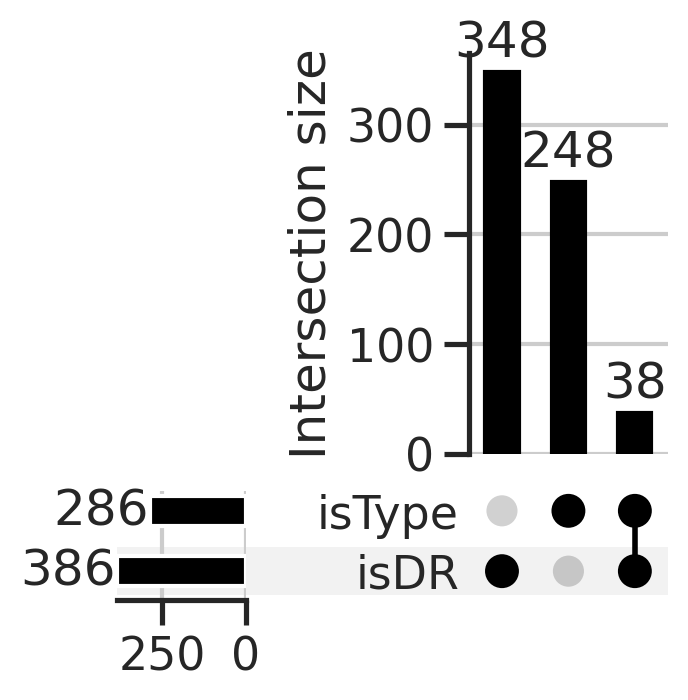

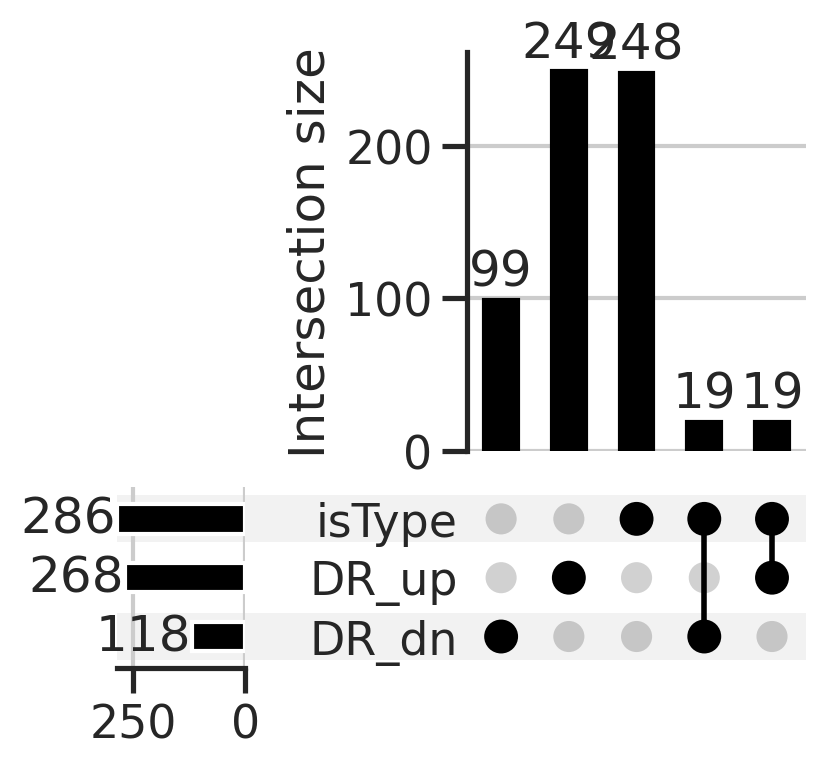

In [44]:
from upsetplot import plot, from_indicators

fig = plt.figure(figsize=(4,6))
plot(from_indicators(indicators=['isType', 'isDR'], data=dfplot), show_counts=True, fig=fig, sort_categories_by='-input')
plt.show()

fig = plt.figure(figsize=(4,6))
plot(from_indicators(indicators=['isType', 'DR_up', 'DR_dn'], data=dfplot), show_counts=True, fig=fig, sort_categories_by='-input')
plt.show()

saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/venn_diagram_2024-07-09.pdf


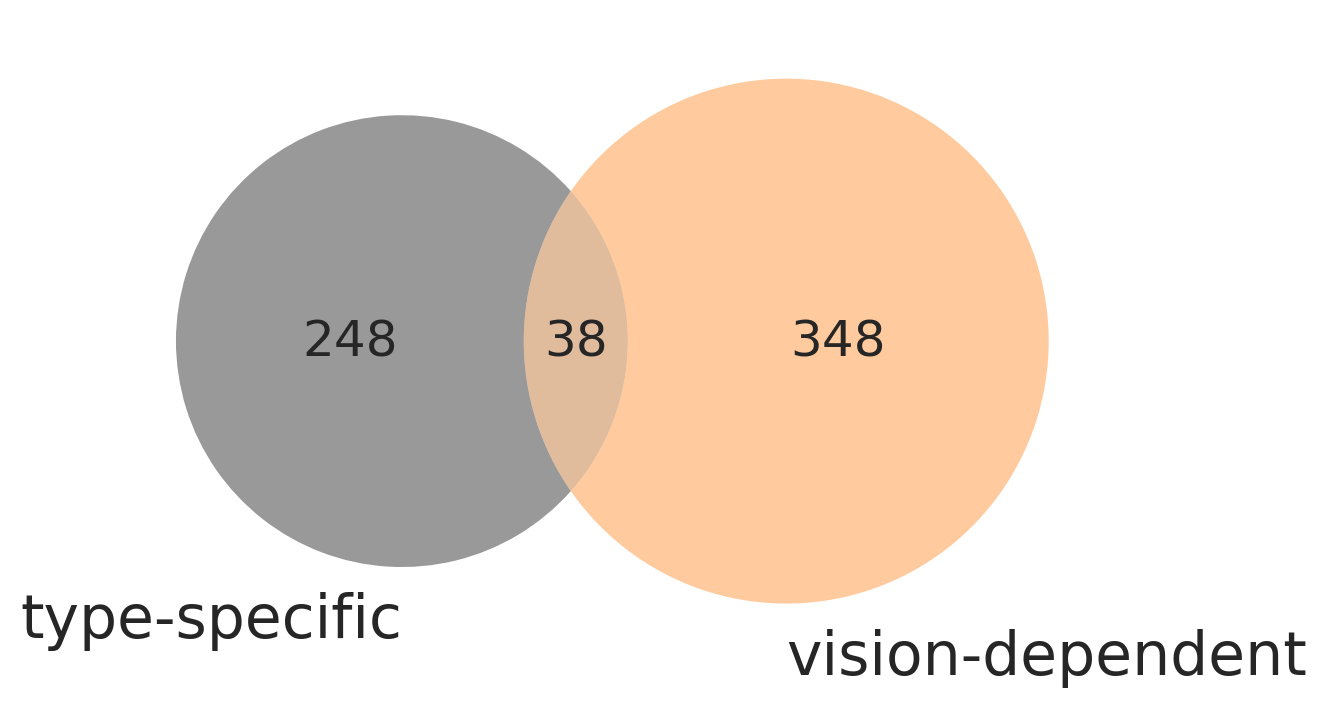

In [45]:
from matplotlib_venn import venn2

fig, ax = plt.subplots()
a = dfplot[dfplot['isType']].index.values
b = dfplot[dfplot['isDR']].index.values
venn2([set(a.tolist()), set(b.tolist())], 
      set_labels=('type-specific', 'vision-dependent'), 
      set_colors=('k', 'C1'),
      ax=ax,
     )
output = os.path.join(outfigdir, "venn_diagram.pdf")
powerplots.savefig_autodate(fig, output)
plt.show()

# how many of those 38 vision-dependent type-specific genes are DEGs in A, B, C?
- a bar plot

In [46]:
df_tv = dfplot[dfplot['isDR']&dfplot['isType']]
df_tv

,DR,type,isType,isDR,DR_up,DR_dn
gene,,,,,,
Arhgap42,DR_dn,C,True,True,False,True
Baz1a,DR_up,B,True,True,True,False
Bdnf,DR_up,B,True,True,True,False
Cbln2,DR_up,C,True,True,True,False
Cdh13,DR_up,A,True,True,True,False
Cdh4,DR_dn,B,True,True,False,True
Chrm2,DR_up,C,True,True,True,False
Clmp,DR_dn,C,True,True,False,True
Col11a1,DR_dn,B,True,True,False,True


In [47]:
res['gene'].unique().shape

(386,)

In [48]:
res.groupby(['type']).size()

type
L2/3_A     70
L2/3_B    226
L2/3_C    304
dtype: int64

In [49]:
res_reduced = res[res['gene'].isin(df_tv.index.values)]  # .groupby(['type', 'reason']).size()
res_reduced['gene'].unique().shape

(38,)

In [50]:
res_summary = res_reduced.groupby(['type', 'reason']).size()
res_summary

type    reason
L2/3_A  DRdn       1
        DRup       5
L2/3_B  DRdn      11
        DRup      10
L2/3_C  DRdn      13
        DRup      14
dtype: int64

In [51]:
res_reduced.sort_values(['gene', 'type', 'reason']) #.apply(lambda x: x.join(','))

,gene,type,reason
547,Arhgap42,L2/3_C,DRdn
353,Baz1a,L2/3_A,DRup
46,Bdnf,L2/3_B,DRup
47,Bdnf,L2/3_C,DRup
431,Cbln2,L2/3_B,DRup
432,Cbln2,L2/3_C,DRup
247,Cdh13,L2/3_B,DRup
248,Cdh13,L2/3_C,DRup
478,Cdh4,L2/3_C,DRdn
150,Chrm2,L2/3_A,DRup


saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/bar_2024-07-09.pdf


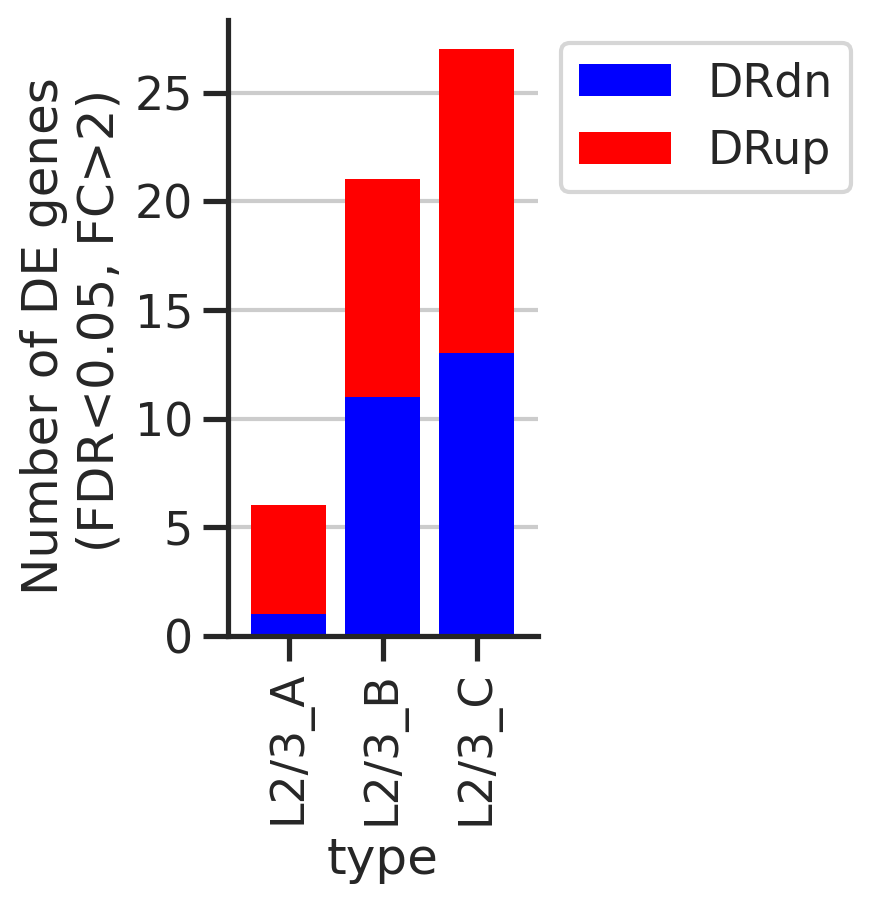

In [65]:
fig, ax = plt.subplots(figsize=(2,4))
res_summary.unstack().plot.bar(stacked=True, width=0.8, edgecolor='none', color=['b', 'r'], ax=ax)
ax.set_ylabel('Number of DE genes \n (FDR<0.05, FC>2)')

ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
ax.grid(axis='x')

output = os.path.join(outfigdir, "bar.pdf")
powerplots.savefig_autodate(fig, output)
plt.show()

In [54]:
res_reduced.groupby(['type', 'reason'])

# visualize those that goes up or down

In [55]:
from scipy.cluster import hierarchy as sch
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/u/project/zipursky/f7xiesnm/code/scroutines/scroutines/basicu.py'>

In [56]:
plotgenes = df2.loc[df2['DR_DE'], 'gene'].values
plotgenes_annot = df2.loc[df2['DR_DE'], 'P17on'].values
plotgenes_idx = basicu.get_index_from_array(genes, plotgenes)

row = plotgenes
col = unq_types

In [57]:
a = pbulks[:,:,:,plotgenes_idx].T
a = np.swapaxes(a,2,3)
a0,a1,a2,a3 = a.shape # gene, type, cond, rep
am = zscore(np.mean(a, axis=(2,3)), axis=1)
af = zscore(a.reshape(a0, a1*a2*a3), axis=1)

gene_idx, gene_Z = basicu.order_by_hc(af, return_Z=True, method='average', metric='correlation')
rowidx = np.array(gene_idx)
colidx = np.array([0,1,2])

colidx_expanded = np.ravel(a2*a3*colidx.reshape(-1,1) + np.repeat(np.arange(a2*a3).reshape(1,-1), len(colidx), axis=0))
col_expanded = np.ravel(np.repeat(np.arange(a2*a3).reshape(1,-1), len(col), axis=0))

In [58]:
nr_mean = np.mean(a, axis=3)[:,:,0]
a_lfc = np.log2(10)*(a-nr_mean.reshape(a0,a1,1,1))
af_lfc = a_lfc.reshape(a0, a1*a2*a3)

saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/deg_3panels_2024-07-09.pdf


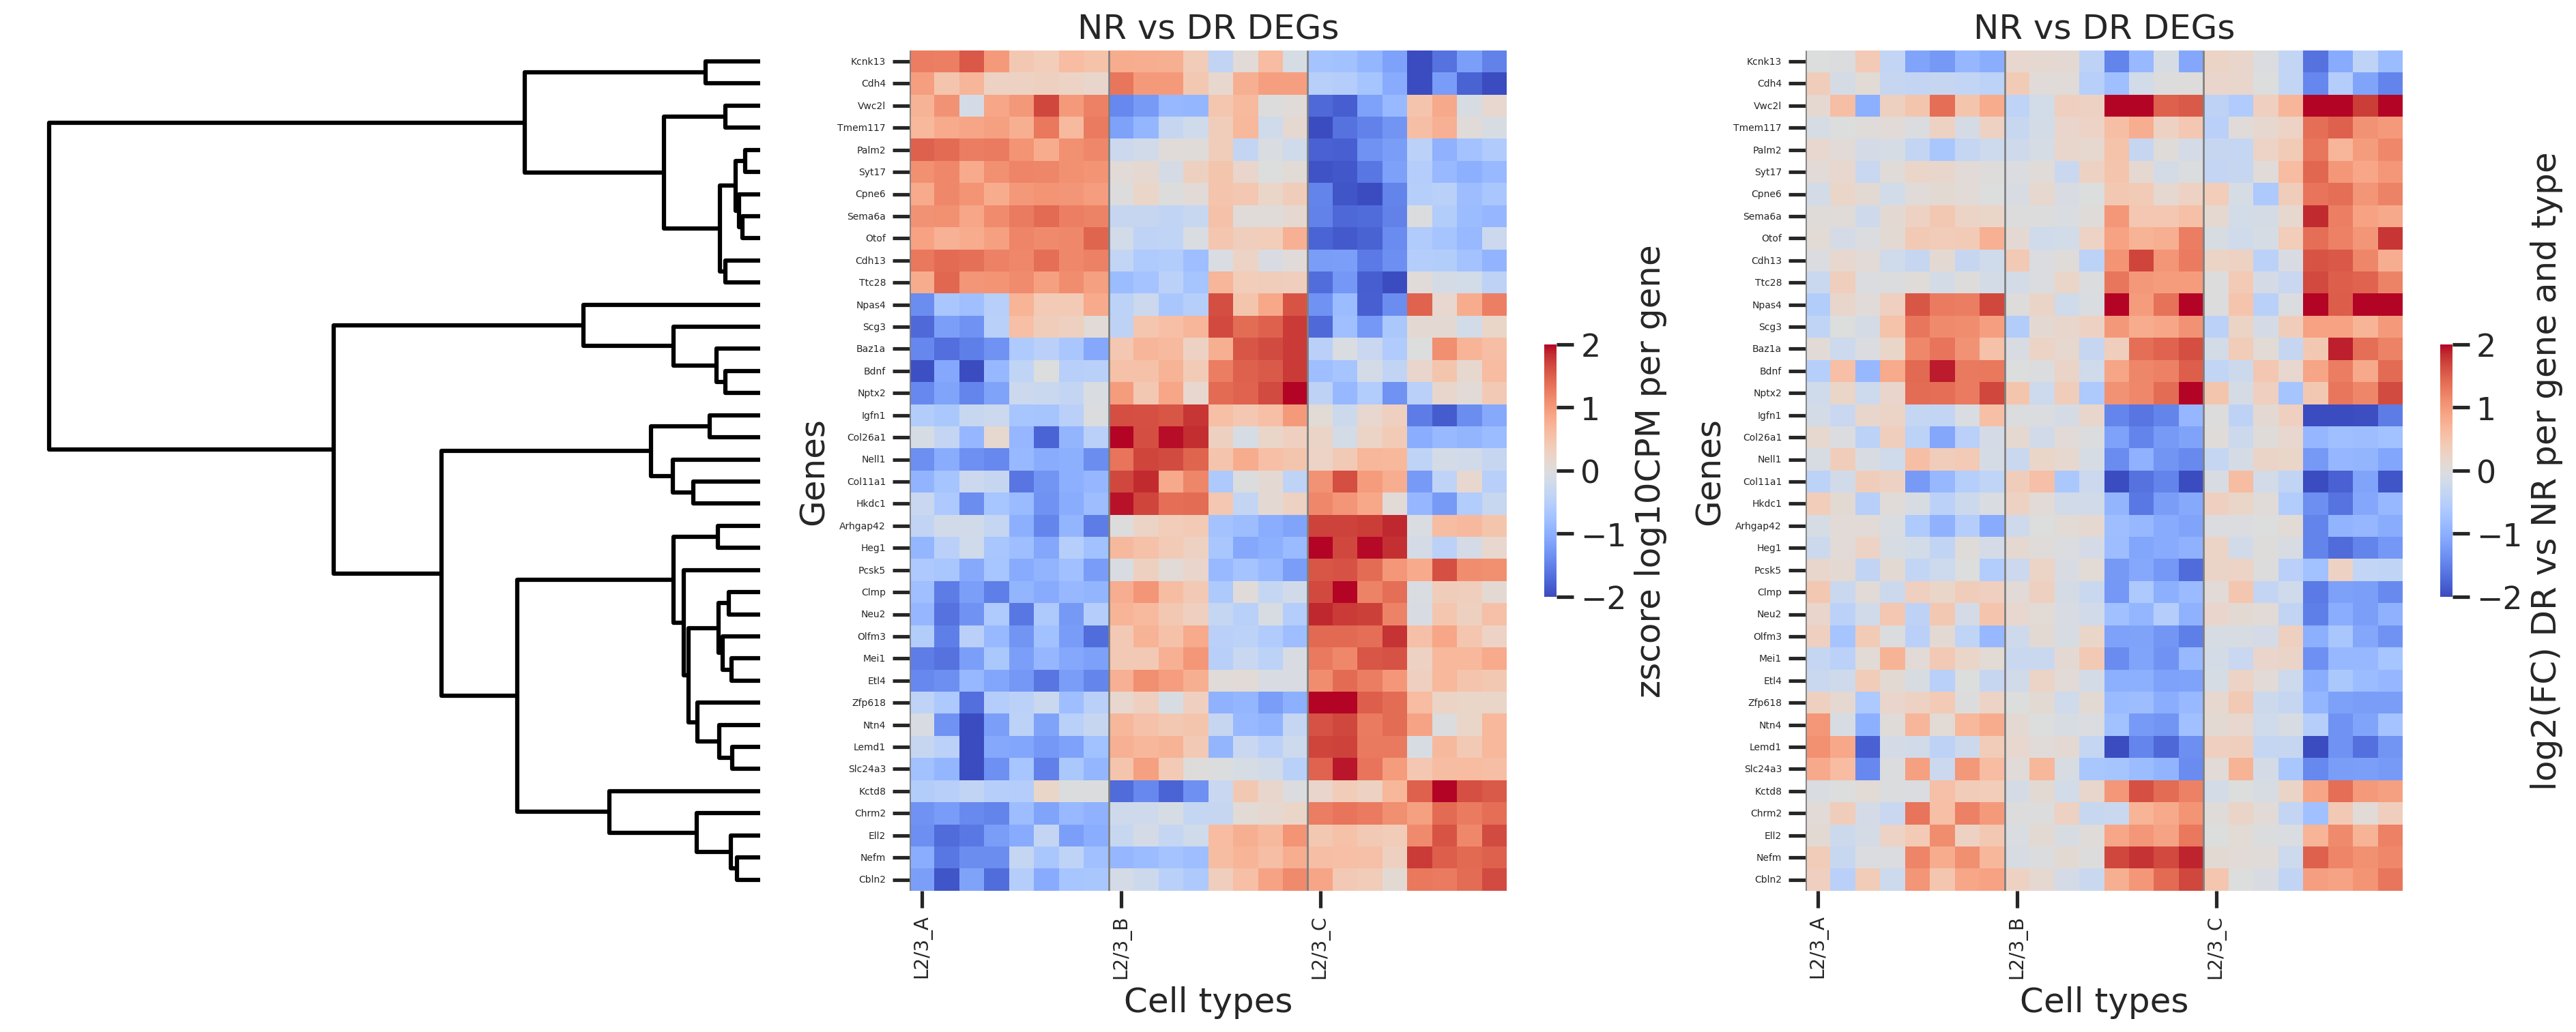

In [59]:
fig, axs = plt.subplots(1,3,figsize=(8*3,8))
ax = axs[0]
sch.dendrogram(gene_Z, 
               color_threshold=0, above_threshold_color='k', 
               orientation='left', no_plot=False, ax=ax)
ax.invert_yaxis()
ax.set_yticks([])
ax.set_xticks([])
sns.despine(ax=ax, left=True, bottom=True)
ax.grid(False)

ax = axs[1]
sns.heatmap(af[rowidx][:,colidx_expanded], 
            yticklabels=True,
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='zscore log10CPM per gene'),
            cmap='coolwarm', 
            center=0, vmin=-2, vmax=2,
            rasterized=True,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(col[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(row[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')

ax = axs[2]
sns.heatmap(af_lfc[rowidx][:,colidx_expanded], 
            yticklabels=True, # 20, #degs[rowidx],
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='log2(FC) DR vs NR per gene and type'),
            cmap='coolwarm', 
            center=0, vmin=-2, vmax=2,
            rasterized=True,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(col[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(row[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')


output = os.path.join(outfigdir, "deg_3panels.pdf")
powerplots.savefig_autodate(fig, output)
plt.show()

saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/deg_2panels_2024-07-09.pdf


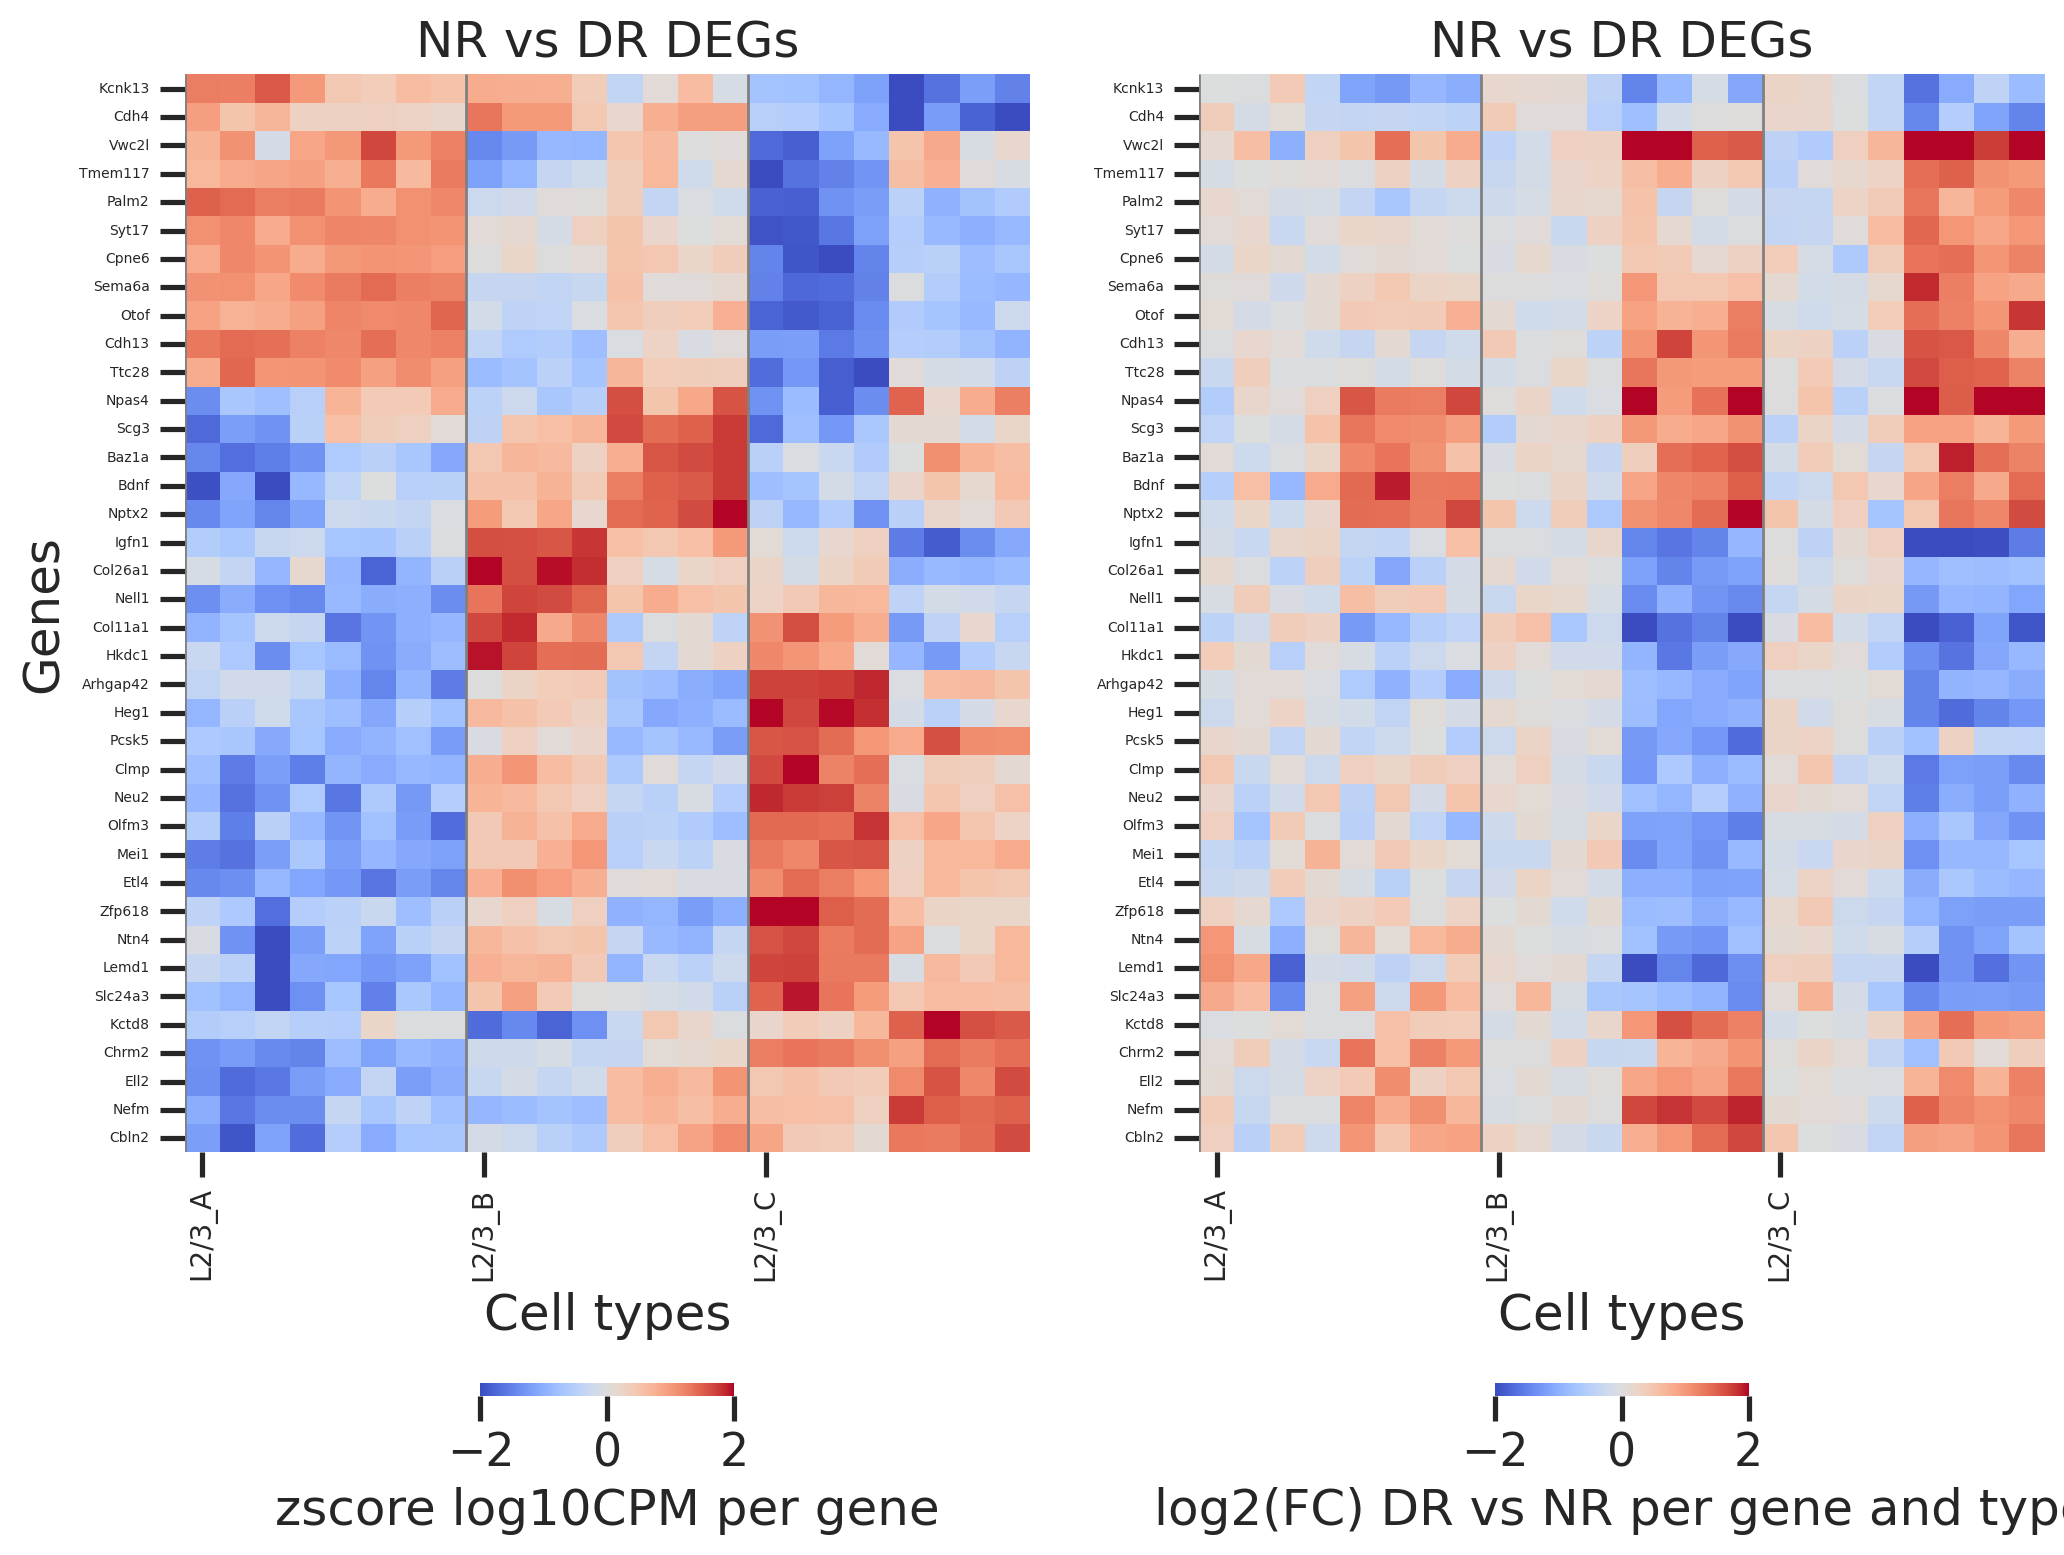

In [60]:
fig, axs = plt.subplots(1,2,figsize=(6*2,10))
ax = axs[0]
sns.heatmap(af[rowidx][:,colidx_expanded], 
            yticklabels=True,
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, orientation='horizontal', label='zscore log10CPM per gene'),
            cmap='coolwarm', 
            center=0, vmin=-2, vmax=2,
            rasterized=True,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(col[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(row[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')

ax = axs[1]
sns.heatmap(af_lfc[rowidx][:,colidx_expanded], 
            yticklabels=True, # 20, #degs[rowidx],
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, orientation='horizontal', label='log2(FC) DR vs NR per gene and type'),
            cmap='coolwarm', 
            center=0, vmin=-2, vmax=2,
            rasterized=True,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(col[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(row[rowidx], rotation=0, fontsize=5)
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')

output = os.path.join(outfigdir, "deg_2panels.pdf")
powerplots.savefig_autodate(fig, output)
plt.show()